# Analysis of THEMATRIX.csv

In [1]:
import seaborn as sbn
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import cPickle as pickle
import os

In [2]:
MATRIX = pd.read_csv(r"C:\Users\sternheimam\Desktop\my-notebook\THEMATRIX.csv",delimiter=";")
BASIX = pd.read_csv(r"C:\Users\sternheimam\Desktop\my-notebook\THEBASIX.csv",delimiter=";")

In [5]:
BASIX.head()

Included features                                  Churn in 1 months  \
0        ((3, 11),)  {'AUC_scores': [0.5321478074596775, 0.56435129...   
1       ((13, 14),)  {'AUC_scores': [0.5561160151324085, 0.57469291...   
2         ((6, 7),)  {'AUC_scores': [0.4902900378310214, 0.49619675...   
3    ((9, 10, 12),)  {'AUC_scores': [0.605892184223389, 0.594301285...   
4      ((4, 5, 8),)  {'AUC_scores': [0.5106728209329069, 0.49996062...   

                                   Churn in 2 months  \
0  {'AUC_scores': [0.5220383190327613, 0.52035786...   
1  {'AUC_scores': [0.5621007149336272, 0.55678953...   
2  {'AUC_scores': [0.5211463414634147, 0.51499861...   
3  {'AUC_scores': [0.5675485937431443, 0.54857855...   
4  {'AUC_scores': [0.5090430883746373, 0.52040512...   

                                   Churn in 3 months  
0  {'AUC_scores': [0.5402768653448001, 0.54397249...  
1  {'AUC_scores': [0.581434046153591, 0.552024713...  
2  {'AUC_scores': [0.515591263616901, 0.504231959...  
3  {'AUC_scores': [0.5582415922947485, 0.55982057...  
4  {'AUC_scores': [0.5106545614413458, 0.52250528...

In [8]:
MATRIX.head()

Included features                                  Churn in 1 months  \
0        ((3, 11),)  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
1       ((13, 14),)  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
2         ((6, 7),)  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
3    ((9, 10, 12),)  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
4      ((4, 5, 8),)  {'parameter_settings': {'reg_alpha': 0, 'n_job...   

                                   Churn in 2 months  \
0  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
1  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
2  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
3  {'parameter_settings': {'reg_alpha': 0, 'n_job...   
4  {'parameter_settings': {'reg_alpha': 0, 'n_job...   

                                   Churn in 3 months  
0  {'parameter_settings': {'reg_alpha': 0, 'n_job...  
1  {'parameter_settings': {'reg_alpha': 0, 'n_job...  
2  {'parameter_settings': {'reg_alpha': 0, 'n_job...  
3  {'parameter_settings': {'reg_alpha': 0, 'n_job...  
4  {'parameter_settings': {'reg_alpha': 0, 'n_job...

In [2]:
#Conversion dictionary
D = {(3,11): "I", # inactivity
     (4,5,8): "T", # textual
     (6,7): "O", # opinion
     (13,14): "O_r", # opinion 'back'
     (9,10,12): "T_r"} # textual 'back'

# AUC analyses

## all means and stds for all cells in matrix

xgboost balanced

In [3]:
import os

path_out = r"C:\Users\sternheimam\Dropbox\TNO\Scriptie\6. Report\figures\matrix_analyses"

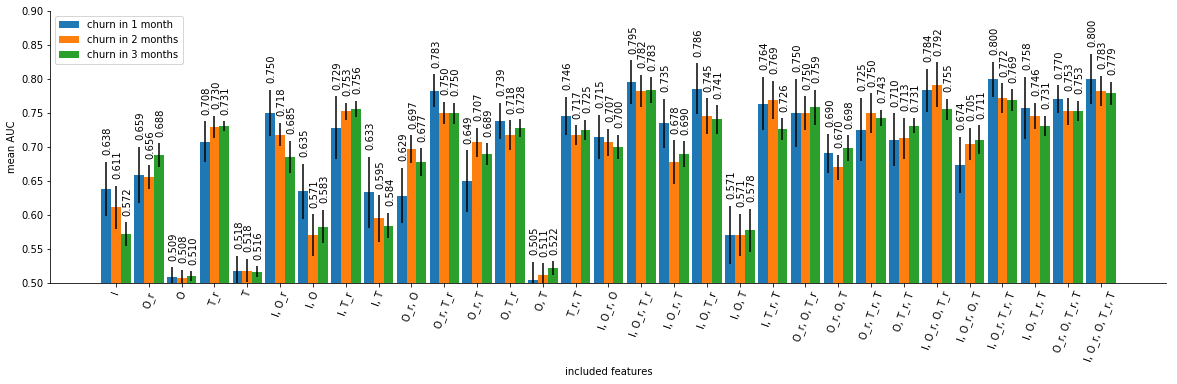

In [43]:
matrix = MATRIX

plt.close()
fig,ax = plt.subplots(figsize=(20,5))
#plt.grid(axis="y")
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.3
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"all_balanced.png"),bbox_inches='tight')
plt.show()

In [44]:
for column in list(matrix.columns):
    if column!= "Included features":
        means = []
        stds = []
        for row in matrix[column]:
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        print column, "%.4f" %np.max(means),means.index(np.max(means)), matrix['Included features'][means.index(np.max(means))]
        print column, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

Churn in 1 months 0.8000 27 ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8))
Churn in 1 months 0.6985 0.0355
Churn in 2 months 0.7918 25 ((3, 11), (13, 14), (6, 7), (9, 10, 12))
Churn in 2 months 0.6917 0.0228
Churn in 3 months 0.7834 16 ((3, 11), (13, 14), (9, 10, 12))
Churn in 3 months 0.6891 0.0167


linear balanced

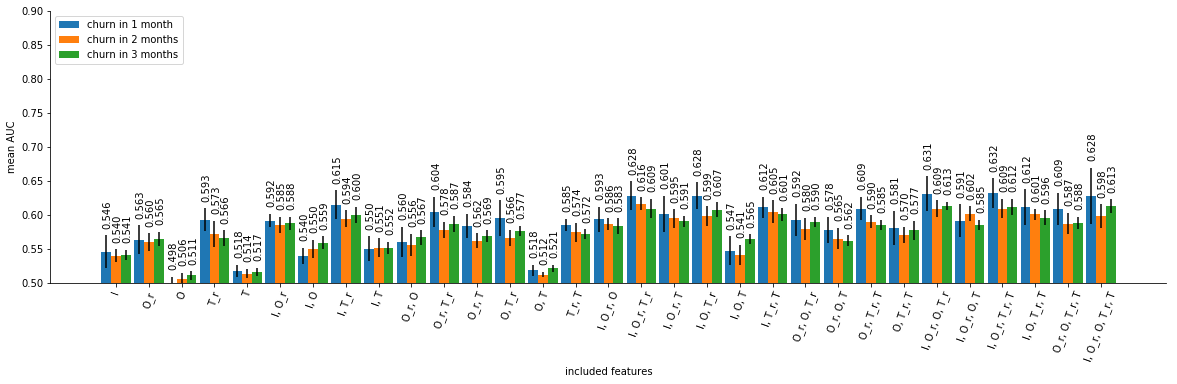

In [15]:
matrix = BASIX

plt.close()
fig,ax = plt.subplots(figsize=(20,5))
#plt.grid(axis="y")
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.3
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"all_linear.png"),bbox_inches='tight')
plt.show()

In [16]:
for column in list(matrix.columns):
    if column!= "Included features":
        means = []
        stds = []
        for row in matrix[column]:
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        print column, "%.4f" %np.max(means),means.index(np.max(means)), matrix['Included features'][means.index(np.max(means))]
        print column, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

Churn in 1 months 0.6316521945590892 27 ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8))
Churn in 2 months 0.6164711695355605 16 ((3, 11), (13, 14), (9, 10, 12))
Churn in 3 months 0.6132830187879532 25 ((3, 11), (13, 14), (6, 7), (9, 10, 12))


## all means and stds for cells in matrix not resulting from 'static' features

In [17]:
def remove_rows_from_matrix(matrix,feature):
    regex = "[^0-9]"+ str(feature) + "[^0-9]"
    new_matrix = matrix[~matrix['Included features'].str.contains(regex)]
    return new_matrix if len(matrix) == len(new_matrix) else remove_rows_from_matrix(new_matrix,feature)

xgboost balanced

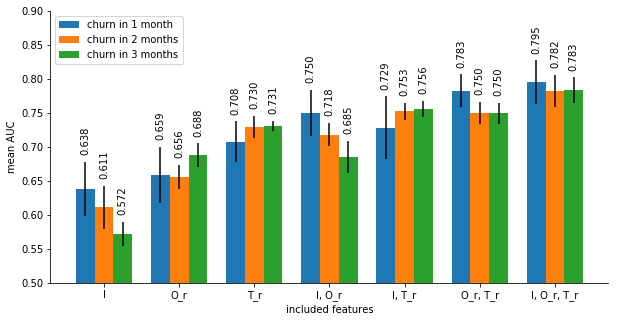

In [18]:
matrix = MATRIX

for x in [4,5,6,7,8]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center", va = "bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"retro_balanced.png"),bbox_inches='tight')
plt.show()

linear balanced

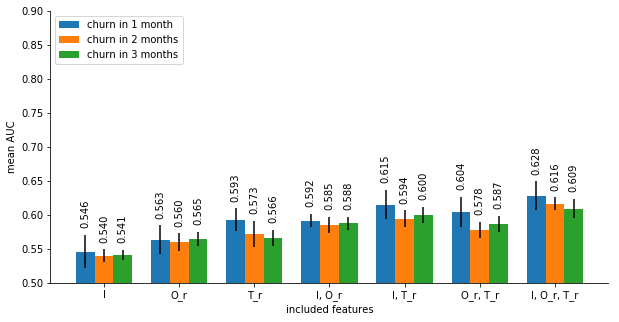

In [19]:
matrix = BASIX

for x in [4,5,6,7,8]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center", va = "bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"retro_linear.png"),bbox_inches='tight')
plt.show()

## the opposite: only from cells resulting from static features

xgboost balanced

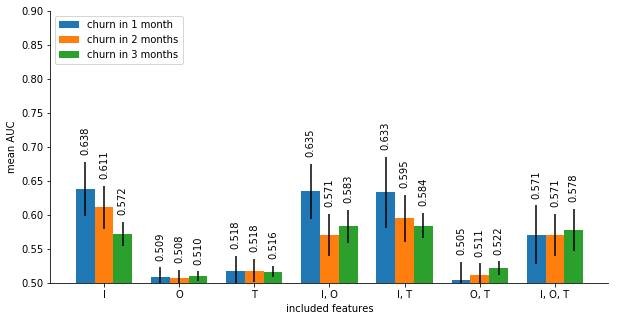

In [20]:
matrix = MATRIX

for x in [9,10,12,13,14]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"static_balanced.png"),bbox_inches='tight')
plt.show()

linear balanced

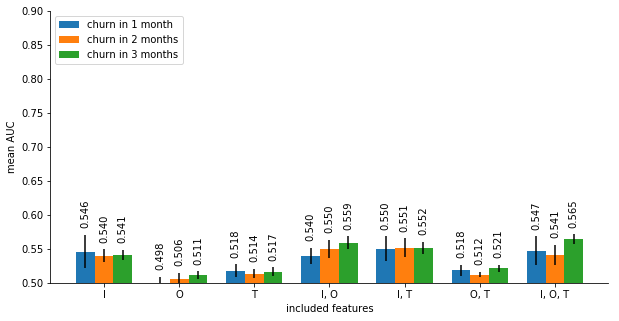

In [21]:
matrix = BASIX

for x in [9,10,12,13,14]:
    matrix = remove_rows_from_matrix(matrix,x)

plt.close()
fig, ax = plt.subplots(figsize=(10,5))
features=[]
for column in list(matrix.columns):
    if column == "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            group = []
            for r in row:
                group.append(D[r])
            features.append(group)
    if column!= "Included features":
        col_index = list(matrix.columns).index(column)
        means = []
        stds = []
        width = 0.25
        for row in matrix[column]:
            N = len(matrix[column])
            ind = np.arange(N)
            means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
            stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-2)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in features])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.savefig(os.path.join(path_out,"static_linear.png"),bbox_inches='tight')
plt.show()

## means and stds only for cells in matrix corresponding to some feature

xgboost balanced

C:\Users\sternheimam\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


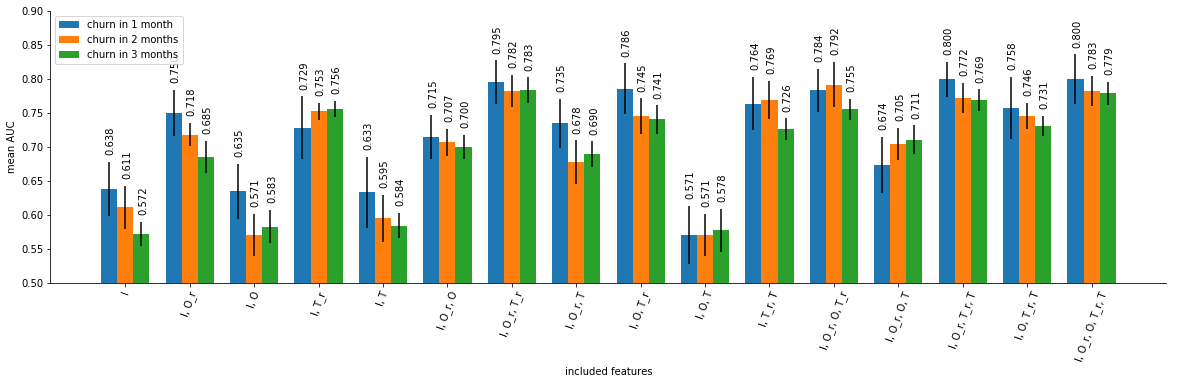

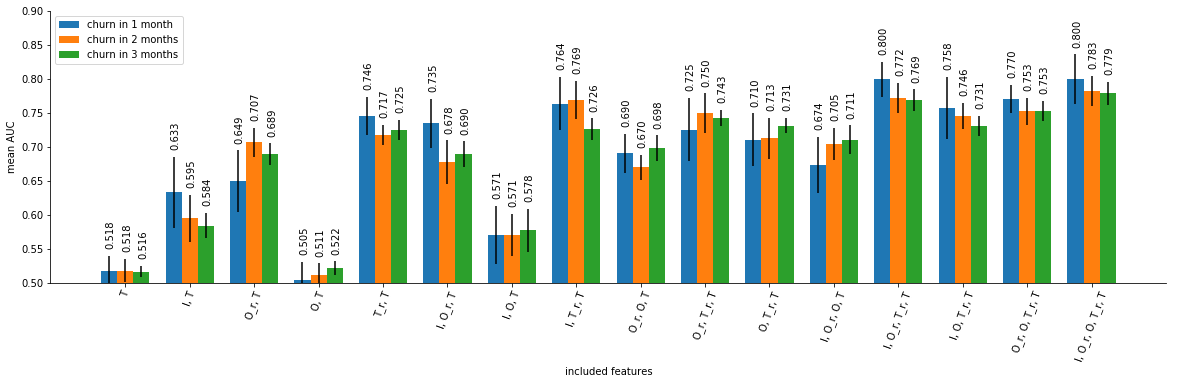

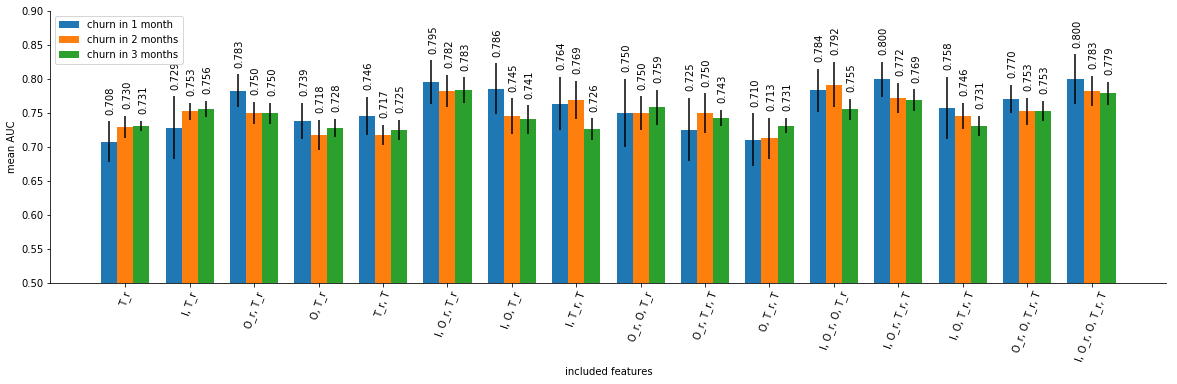

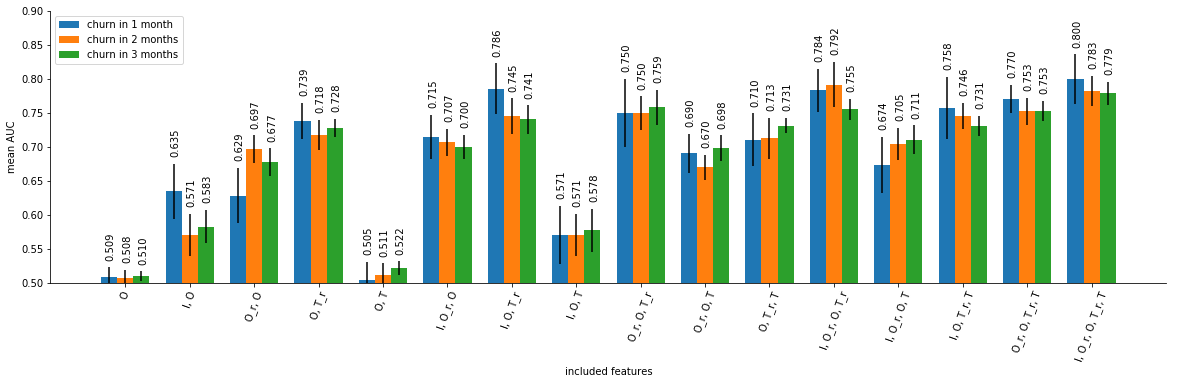

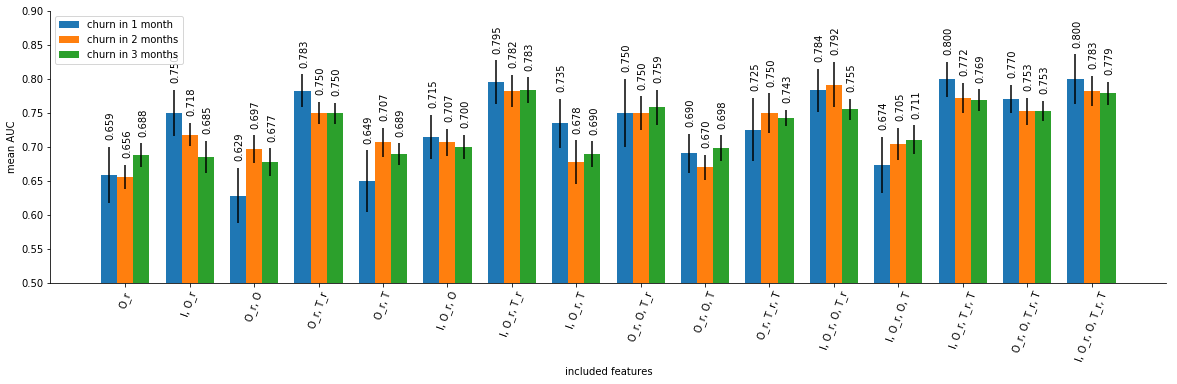

In [22]:
matrix = MATRIX

for x in [(3,11),(4,5,8),(9,10,12),(6,7),(13,14)]:
    regex = str(x)
    small_MATRIX = matrix[matrix['Included features'].str.contains(regex)]
    
    title = "features contain "+D[x]
    
    plt.close()
    fig, ax = plt.subplots(figsize=(20,5))
    features=[]
    for column in list(small_MATRIX.columns):
        if column == "Included features":
            for row in small_MATRIX[column]:
                row = ast.literal_eval(row)
                group = []
                for r in row:
                    group.append(D[r])
                features.append(group)
        if column!= "Included features":
            col_index = list(small_MATRIX.columns).index(column)
            means = []
            stds = []
            width = 0.25
            for row in small_MATRIX[column]:
                N = len(small_MATRIX[column])
                ind = np.arange(N)
                means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
                stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
            ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
            for i, v in enumerate(means):
                ax.text(i+((col_index-1.9)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in features], rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
    #ax.set_title(title)
    plt.savefig(os.path.join(path_out,"%s_balanced.png" %D[x]),bbox_inches='tight')
    plt.show()

linear balanced

C:\Users\sternheimam\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


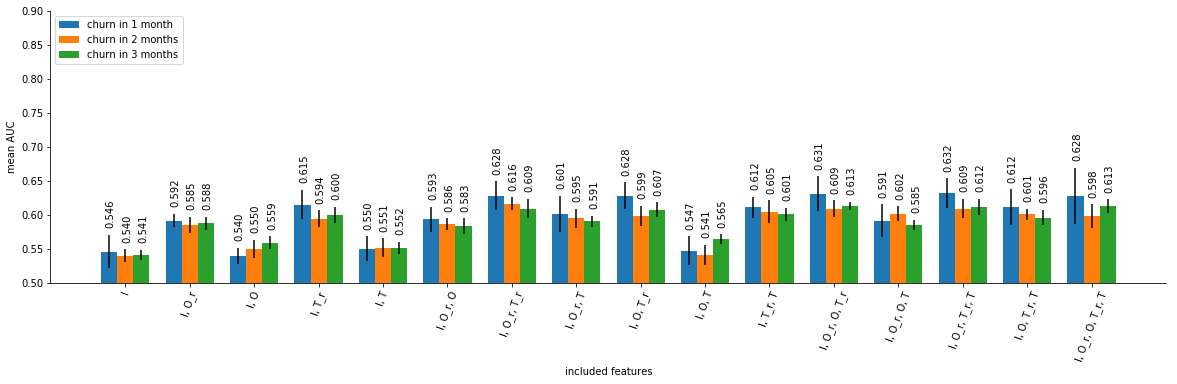

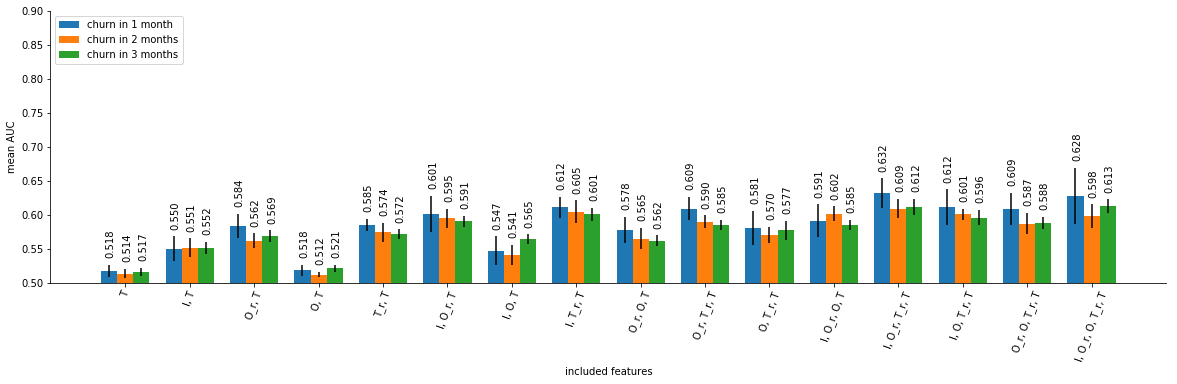

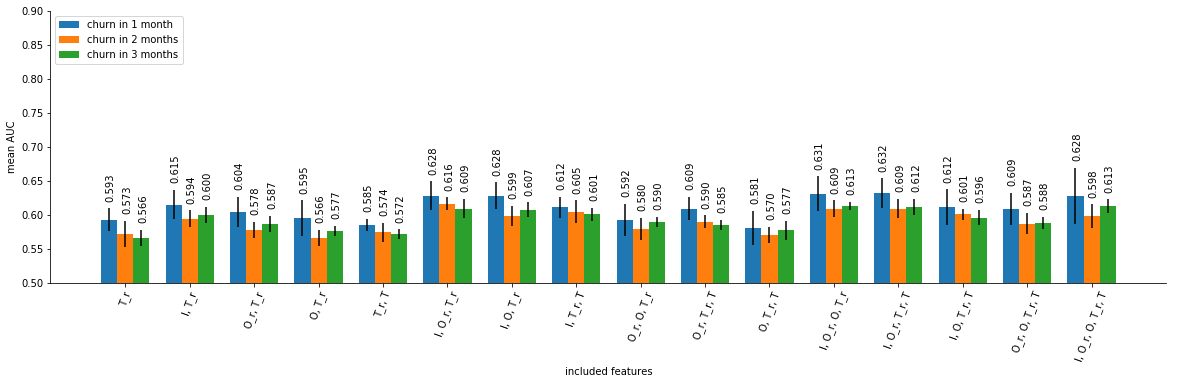

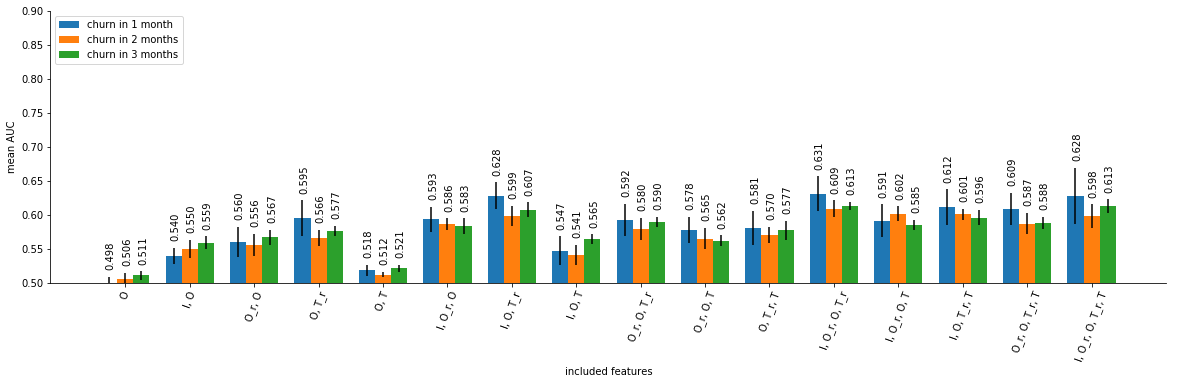

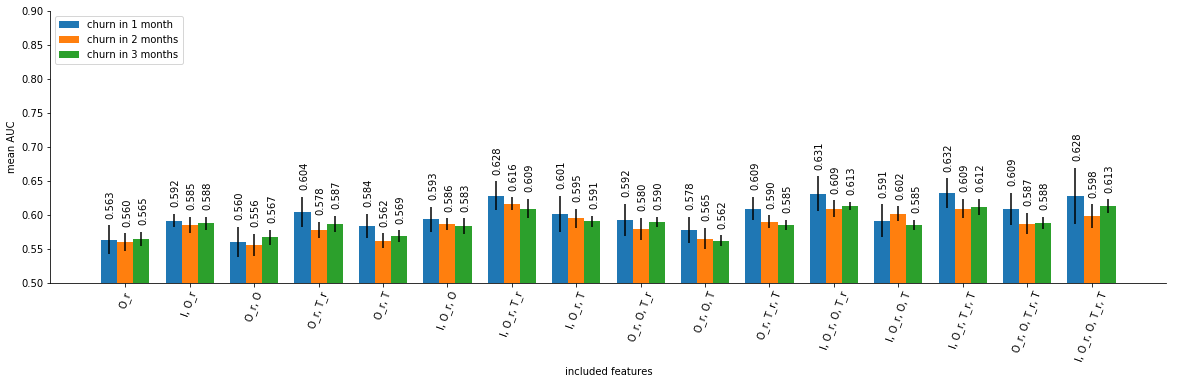

In [23]:
matrix = BASIX

for x in [(3,11),(4,5,8),(9,10,12),(6,7),(13,14)]:
    regex = str(x)
    small_MATRIX = matrix[matrix['Included features'].str.contains(regex)]
    
    title = "features contain "+D[x]
    
    plt.close()
    fig, ax = plt.subplots(figsize=(20,5))
    features=[]
    for column in list(small_MATRIX.columns):
        if column == "Included features":
            for row in small_MATRIX[column]:
                row = ast.literal_eval(row)
                group = []
                for r in row:
                    group.append(D[r])
                features.append(group)
        if column!= "Included features":
            col_index = list(small_MATRIX.columns).index(column)
            means = []
            stds = []
            width = 0.25
            for row in small_MATRIX[column]:
                N = len(small_MATRIX[column])
                ind = np.arange(N)
                means.append(np.mean(ast.literal_eval(row)['AUC_scores']))
                stds.append(np.std(ast.literal_eval(row)['AUC_scores']))
            ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
            for i, v in enumerate(means):
                ax.text(i+((col_index-1.9)*width),v+stds[i]+0.01,"%.3f"%v, rotation=90,ha="center",va="bottom")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in features], rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
    #ax.set_title(title)
    plt.savefig(os.path.join(path_out,"%s_linear.png" %D[x]),bbox_inches='tight')
    plt.show()

# making a nice overview of relevant information

In [145]:
matrix = BASIX

In [148]:
new_matrix = pd.DataFrame()
for column in list(matrix.columns):
    churnvalues = []

    means = []
    stds = []
    if column == "Included features":
        for row in matrix[column]:
            churnvalues.append(row)    
    if column!= "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            means.append(np.mean(row['AUC_scores']))
            stds.append(np.std(row['AUC_scores']))
        for i in range(len(matrix)):
            churnvalues.append(r"%.3f $\pm$ %.3f" %(means[i],stds[i]))
    new_matrix[column]=churnvalues

In [157]:

new_matrix

Churn in 1 months  Churn in 2 months  Churn in 3 months Values
0   0.546 $\pm$ 0.024  0.540 $\pm$ 0.010  0.541 $\pm$ 0.008    AUC
1   0.563 $\pm$ 0.021  0.560 $\pm$ 0.013  0.565 $\pm$ 0.011    AUC
2   0.498 $\pm$ 0.011  0.506 $\pm$ 0.009  0.511 $\pm$ 0.006    AUC
3   0.593 $\pm$ 0.017  0.573 $\pm$ 0.019  0.566 $\pm$ 0.011    AUC
4   0.518 $\pm$ 0.009  0.514 $\pm$ 0.007  0.517 $\pm$ 0.006    AUC
5   0.592 $\pm$ 0.010  0.585 $\pm$ 0.012  0.588 $\pm$ 0.009    AUC
6   0.540 $\pm$ 0.012  0.550 $\pm$ 0.013  0.559 $\pm$ 0.009    AUC
7   0.615 $\pm$ 0.022  0.594 $\pm$ 0.013  0.600 $\pm$ 0.012    AUC
8   0.550 $\pm$ 0.018  0.551 $\pm$ 0.014  0.552 $\pm$ 0.009    AUC
9   0.560 $\pm$ 0.022  0.556 $\pm$ 0.017  0.567 $\pm$ 0.011    AUC
10  0.604 $\pm$ 0.023  0.578 $\pm$ 0.012  0.587 $\pm$ 0.012    AUC
11  0.584 $\pm$ 0.018  0.562 $\pm$ 0.011  0.569 $\pm$ 0.009    AUC
12  0.595 $\pm$ 0.026  0.566 $\pm$ 0.012  0.577 $\pm$ 0.007    AUC
13  0.518 $\pm$ 0.008  0.512 $\pm$ 0.004  0.521 $\pm$ 0.005    AUC
14  0.585 $\pm$ 0.009  0.574 $\pm$ 0.014  0.572 $\pm$ 0.007    AUC
15  0.593 $\pm$ 0.019  0.586 $\pm$ 0.009  0.583 $\pm$ 0.011    AUC
16  0.628 $\pm$ 0.021  0.616 $\pm$ 0.010  0.609 $\pm$ 0.014    AUC
17  0.601 $\pm$ 0.027  0.595 $\pm$ 0.014  0.591 $\pm$ 0.008    AUC
18  0.628 $\pm$ 0.020  0.599 $\pm$ 0.014  0.607 $\pm$ 0.011    AUC
19  0.547 $\pm$ 0.021  0.541 $\pm$ 0.015  0.565 $\pm$ 0.007    AUC
20  0.612 $\pm$ 0.015  0.605 $\pm$ 0.017  0.601 $\pm$ 0.010    AUC
21  0.592 $\pm$ 0.024  0.580 $\pm$ 0.016  0.590 $\pm$ 0.008    AUC
22  0.578 $\pm$ 0.020  0.565 $\pm$ 0.016  0.562 $\pm$ 0.008    AUC
23  0.609 $\pm$ 0.017  0.590 $\pm$ 0.009  0.585 $\pm$ 0.008    AUC
24  0.581 $\pm$ 0.025  0.570 $\pm$ 0.012  0.577 $\pm$ 0.014    AUC
25  0.631 $\pm$ 0.026  0.609 $\pm$ 0.012  0.613 $\pm$ 0.006    AUC
26  0.591 $\pm$ 0.024  0.602 $\pm$ 0.011  0.585 $\pm$ 0.008    AUC
27  0.632 $\pm$ 0.022  0.609 $\pm$ 0.014  0.612 $\pm$ 0.012    AUC
28  0.612 $\pm$ 0.026  0.601 $\pm$ 0.008  0.596 $\pm$ 0.011    AUC
29  0.609 $\pm$ 0.024  0.587 $\pm$ 0.016  0.588 $\pm$ 0.009    AUC
30  0.628 $\pm$ 0.041  0.598 $\pm$ 0.017  0.613 $\pm$ 0.010    AUC

In [158]:
new_matrix.to_csv("shortbasix.csv", sep="&",index=False)

# significance of differences between AUC scores 

In [189]:
matrix = MATRIX

In [25]:
def plot_significance_matrix(dataframe,column):
    plt.close()
    plt.figure(figsize=(20,20))
    mask = np.zeros_like(dataframe, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    if column == "Churn in 1 months":
        color = "Blues_r"
    elif column == "Churn in 2 months":
        color = "Oranges_r"
    else:
        color = "Greens_r"
    cmap = sbn.color_palette(color)
    sbn.heatmap(dataframe, mask=mask, cmap=cmap,square=True,cbar_kws = {"shrink":.5},vmin=0.0,vmax=0.06,annot=True,fmt='.3f')
    #plt.title(column)
    plt.savefig(os.path.join(path_out,"significance%s.png" %column),bbox_inches='tight')
    plt.show()

In [26]:
def non_normal(distribution,alpha = 0.05):
    _,p = stats.normaltest(distribution)
    return True if p<alpha else False

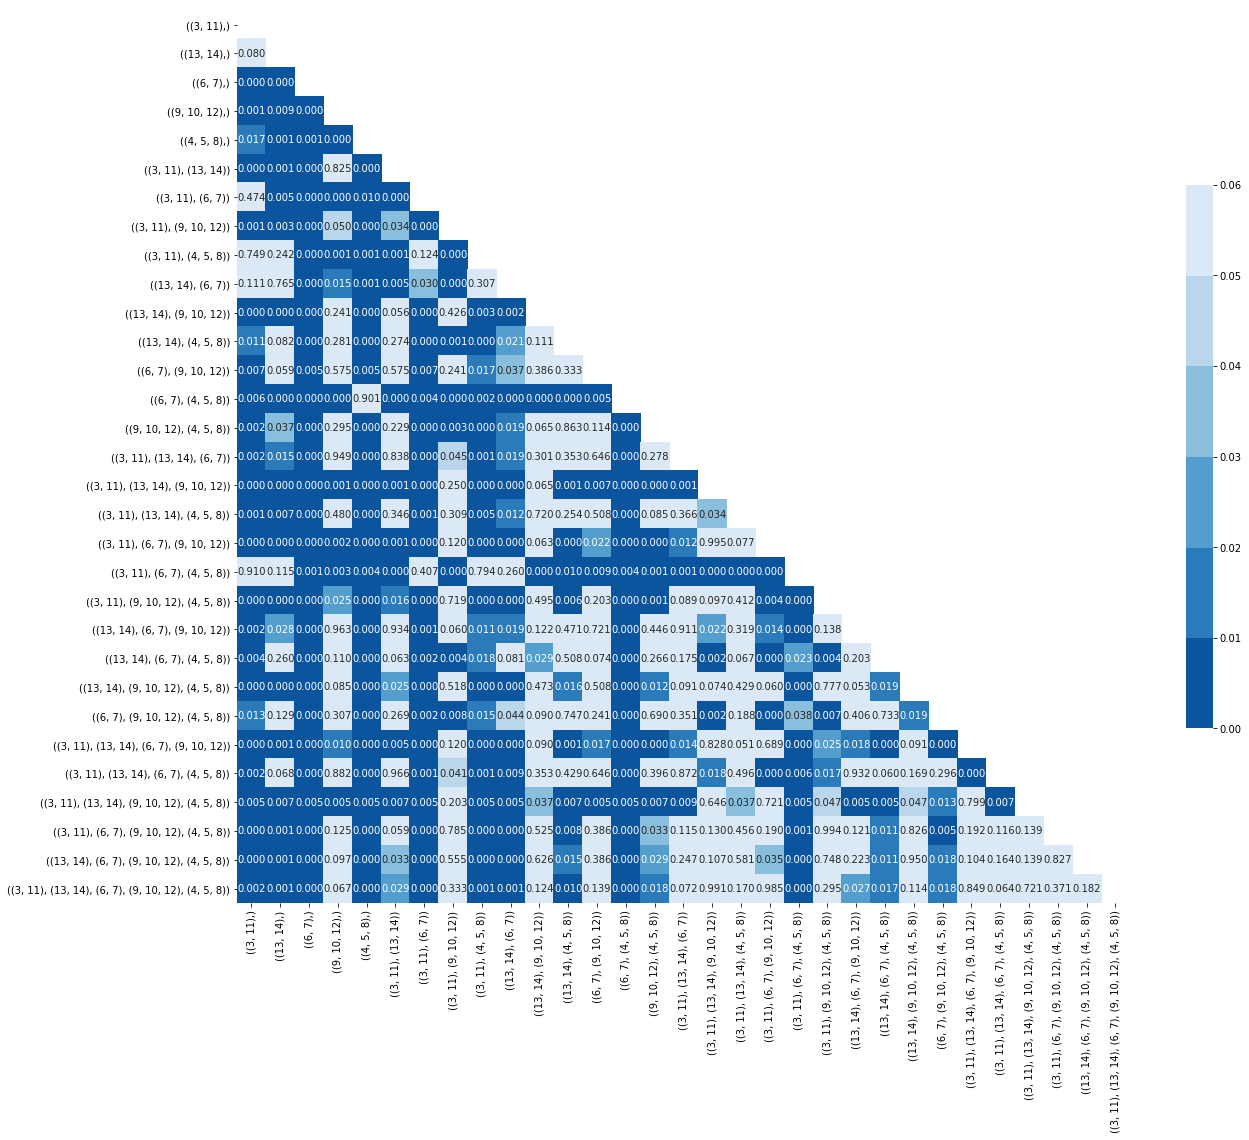

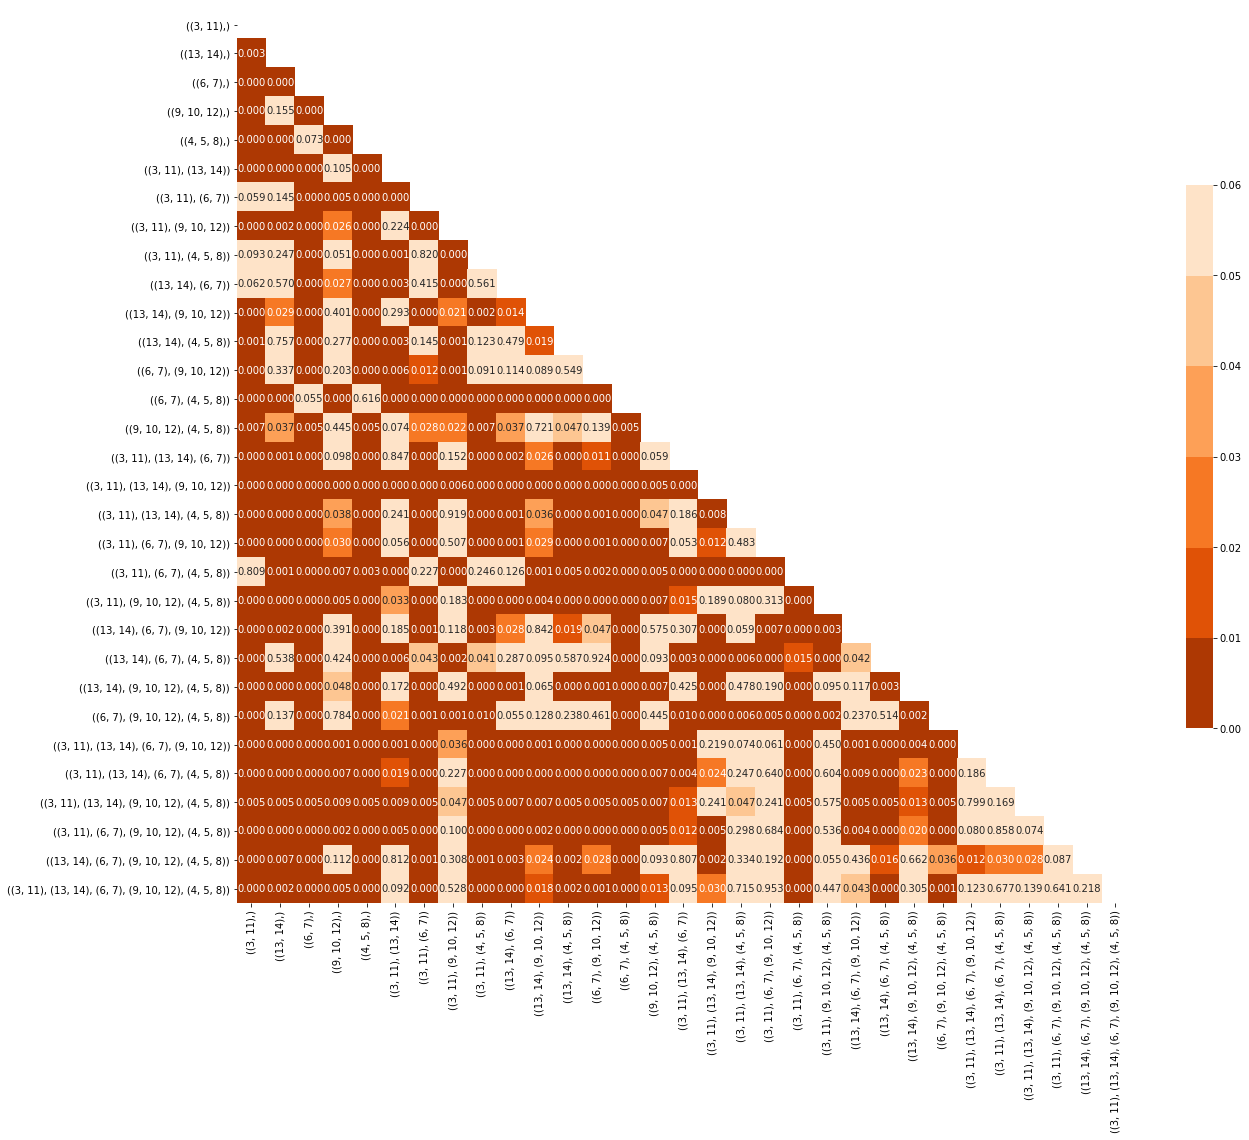

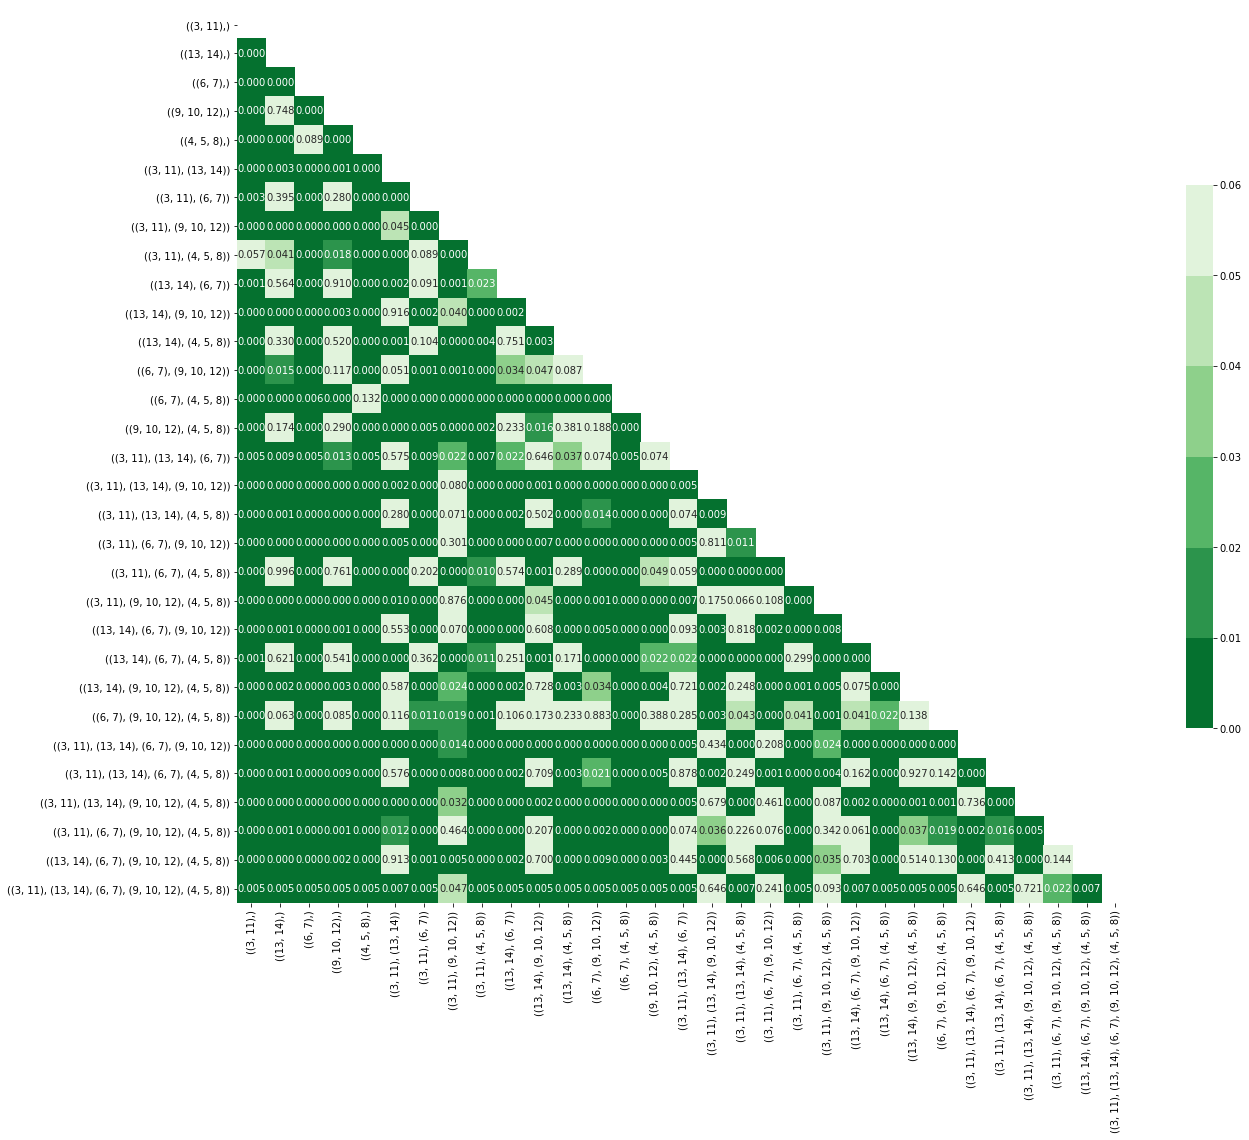

In [29]:
significance_matrix = pd.DataFrame()
churnvalues = []
for column in list(matrix.columns):
    scores = []
    if column == "Included features":
        for row in matrix[column]:
            churnvalues.append(row)
    if column != "Included features":
        for row in matrix[column]:
            row = ast.literal_eval(row)
            scores.append(row['AUC_scores'])
        for t1 in scores:
            c = []
            for t2 in scores:
                r = []
                # als een van de twee nonnormal is, dan gaan we wilcoxon doen. anders doe je t-test.
                if non_normal(t1) or non_normal(t2):
                    _,r = stats.wilcoxon(t1,t2)
                else:
                    _,r = stats.ttest_rel(t1, t2)
                c.append(r)
            significance_matrix[churnvalues[scores.index(t1)]]=c
        D = dict()
        for i,v in enumerate(list(significance_matrix.columns)):
            D[i] = v
        significance_matrix.rename(D,inplace=True)
        plot_significance_matrix(significance_matrix,column)

In [173]:
#Conversion dictionary
D = {(3,11): "I", # inactivity
     (4,5,8): "T", # textual
     (6,7): "O", # opinion
     (13,14): "O_r", # opinion 'back'
     (9,10,12): "T_r"} # textual 'back'

In [3]:
path_in = r".\output"

In [4]:
path_out = r".\output"

In [35]:
U_child = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_child.p"), "r" ) )
B_child = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_child.p"), "r" ) )
B_nochild = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_nochild.p"), "r" ) )
U_nochild = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_nochild.p"), "r" ) )
U_child5 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_child5.p"), "r" ) )
B_child5 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_child5.p"), "r" ) )
U_child10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_child10.p"), "r" ) )
B_child10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_child10.p"), "r" ) )

In [53]:
U_gamma0 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_gamma0.p"), "r" ) )
B_gamma0 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_gamma0.p"), "r" ) )
U_gamma10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_gamma10.p"), "r" ) )
B_gamma10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_gamma10.p"), "r" ) )
U_gamma1 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_gamma1.p"), "r" ) )
B_gamma1 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_gamma1.p"), "r" ) )

In [56]:
U_def = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_default.p"), "r" ) )
B_def = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_default.p"), "r" ) )

In [57]:
for b in B_def:
    aucs=[]
    for auc,sets in B_def[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6825295440199685

0.6603445883743099

0.6605641793521401



In [58]:
for b in U_def:
    aucs=[]
    for auc,sets in U_def[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6578802794360529

0.6537522621752597

0.6552772719004311



min_child_weight van 0 naar 10 vershuiven verlaagde de AUC op de test set
gamma van 0 naar 10 verschuiven maakte churn in 2 en 3 m veel lager, en churn in 1m bleef nagenoeg gelijk
gamma van 0 naar 0.1 verschuiven veranderde weinig aan churn

verder wil ik hier nu echt mee ophouden want ik word er gek van.
Ik begrijp niet waarom ik met xgb.cv (bij lange na) niet dezelfde resultaten krijg
en met de hand alles de hele tijd doorvoeren is echt verrekte vervelend en langzaam.
dus ik hou op stephan. T is klaar.

In [29]:
for b in B_nochild:
    aucs=[]
    for auc,sets in B_nochild[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6716673832145276

0.6733231509792202

0.6555526488118294



In [49]:
for b in B_child10:
    aucs=[]
    for auc,sets in B_child10[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6241534016189254

0.660045322585719

0.6552055138344637



In [40]:
for b in B_gamma0:
    aucs=[]
    for auc,sets in B_gamma0[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6666092135583145

0.6874960718933971

0.6707102121054436



In [54]:
for b in B_gamma1:
    aucs=[]
    for auc,sets in B_gamma1[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6708775277591713

0.6628437102588062

0.6611391569330031



In [51]:
for b in B_gamma10:
    aucs=[]
    for auc,sets in B_gamma10[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6715197086736302

0.6512760233714138

0.6330934238047574



In [52]:
for b in U_nochild:
    aucs=[]
    for auc,sets in U_nochild[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6777512333680245

0.6699730059501269

0.6667625910587104



In [43]:
for b in U_gamma0:
    aucs=[]
    for auc,sets in U_gamma0[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6763594540181076

0.6731257906109348

0.6647494836567407



In [55]:
for b in U_gamma1:
    aucs=[]
    for auc,sets in U_gamma1[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6587891261845893

0.6671487368597503

0.6649014983683784



In [48]:
for b in U_gamma10:
    aucs=[]
    for auc,sets in U_gamma10[b]:
        aucs.append(auc)
    print np.mean(aucs)
    print

0.6703060369139459

0.6512638333199209

0.6460166244298111



In [6]:
U6 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced6.p"), "r" ) )
U7 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced7.p"), "r" ) )
U8 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced8.p"), "r" ) )
U9 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced9.p"), "r" ) )
U10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced10.p"), "r" ) )                 

B6 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced6.p"), "r" ) )
B7 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced7.p"), "r" ) )
B8 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced8.p"), "r" ) )
B9 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced9.p"), "r" ) )
B10 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced10.p"), "r" ) )
                  


In [4]:
def Features():
    iset = set()
    for dependent, independent in U9.keys():
        iset.add(independent)
    ilist = list(iset)
    ilist = sorted(ilist,key= lambda x: (len(x),x[0][0]))

    return ilist

In [7]:
def Readable(list_of_feature_groups):
    readable_feature_groups=[]
    for group in list_of_feature_groups:
        G = []
        for features in group:
            G.append(D[features])
        readable_feature_groups.append(G)
    return readable_feature_groups

In [69]:
list_of_feature_groups = Features()
print list_of_feature_groups
print Readable(list_of_feature_groups)

[((3, 11),), ((4, 5, 8),), ((6, 7),), ((9, 10, 12),), ((13, 14),), ((3, 11), (9, 10, 12)), ((3, 11), (6, 7)), ((3, 11), (4, 5, 8)), ((3, 11), (13, 14)), ((6, 7), (9, 10, 12)), ((6, 7), (4, 5, 8)), ((9, 10, 12), (4, 5, 8)), ((13, 14), (4, 5, 8)), ((13, 14), (6, 7)), ((13, 14), (9, 10, 12)), ((3, 11), (13, 14), (9, 10, 12)), ((3, 11), (6, 7), (9, 10, 12)), ((3, 11), (6, 7), (4, 5, 8)), ((3, 11), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7)), ((3, 11), (13, 14), (4, 5, 8)), ((6, 7), (9, 10, 12), (4, 5, 8)), ((13, 14), (9, 10, 12), (4, 5, 8)), ((13, 14), (6, 7), (9, 10, 12)), ((13, 14), (6, 7), (4, 5, 8)), ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (4, 5, 8)), ((3, 11), (6, 7), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12)), ((13, 14), (6, 7), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12), (4, 5, 8))]
[['I'], ['T'], ['O'], ['T_r'], ['O_r'], ['I', 'T_r'], ['I', 'O'], ['I', 'T'], ['I', 'O_r'], ['O', 'T_r'], ['O', 'T']

In [9]:
list_of_dependent_variables = [0,1,2]

9 is een mooi voorbeeld.

In [209]:
def Select(groups_list, selection=None):
    groups = []
    if selection == None:
        return groups_list
    elif type(selection)==tuple:
        Include = set([selection])
    elif selection == "retro":
        Omit = set(((4,5,8),(6,7)))
    elif selection == "static":
        Omit = set(((13,14),(9,10,12)))

    for group in groups_list:
        if type(selection)==tuple:
            if len(set(group).intersection(Include)) != 0:
                groups.append(group)
        elif len(set(group).intersection(Omit)) == 0:
                groups.append(group)
    return groups

print Select(Features(),(9,10,12))

[((9, 10, 12),), ((3, 11), (9, 10, 12)), ((6, 7), (9, 10, 12)), ((9, 10, 12), (4, 5, 8)), ((13, 14), (9, 10, 12)), ((3, 11), (13, 14), (9, 10, 12)), ((3, 11), (6, 7), (9, 10, 12)), ((3, 11), (9, 10, 12), (4, 5, 8)), ((6, 7), (9, 10, 12), (4, 5, 8)), ((13, 14), (9, 10, 12), (4, 5, 8)), ((13, 14), (6, 7), (9, 10, 12)), ((3, 11), (13, 14), (9, 10, 12), (4, 5, 8)), ((3, 11), (6, 7), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12)), ((13, 14), (6, 7), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12), (4, 5, 8))]


(13, 14)


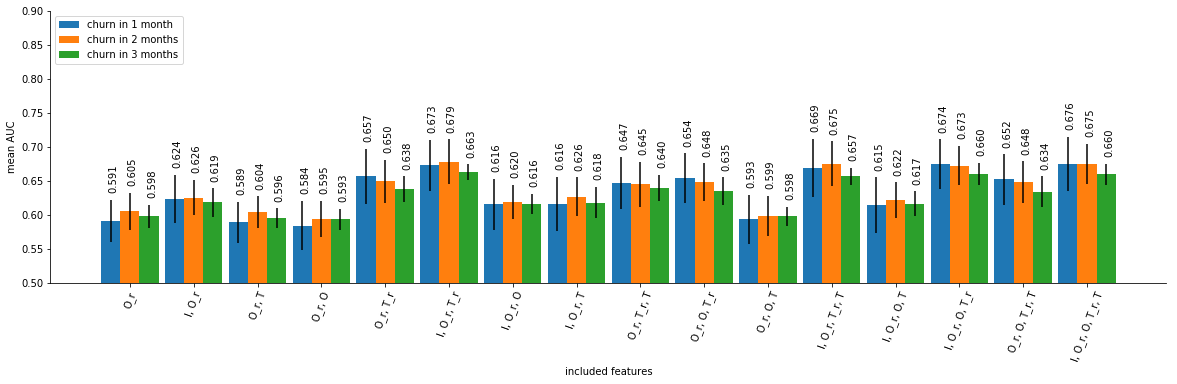

(4, 5, 8)


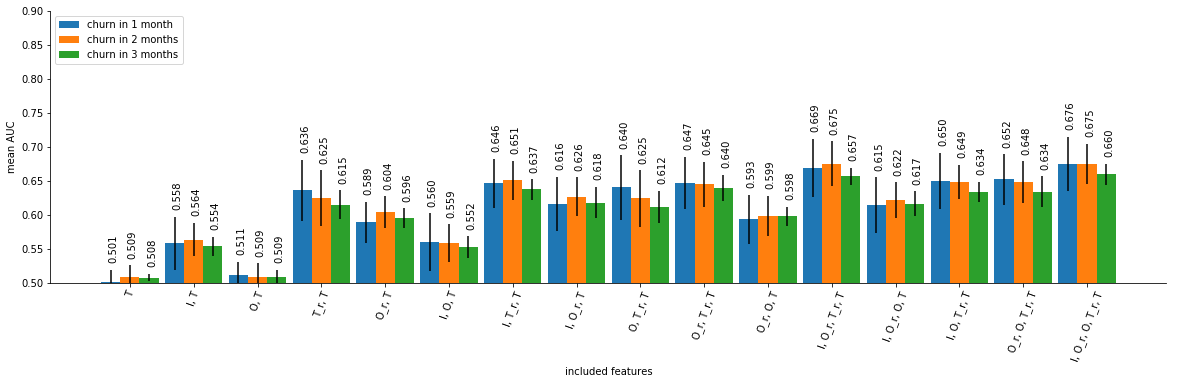

(6, 7)


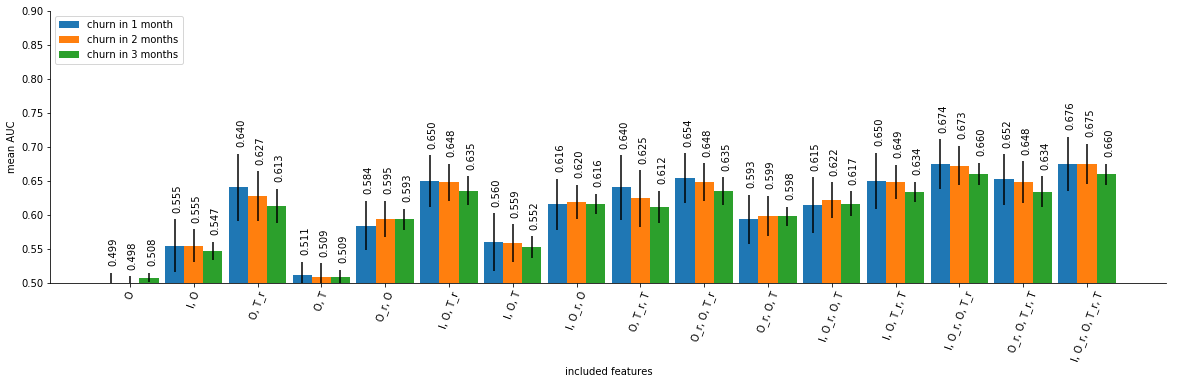

(3, 11)


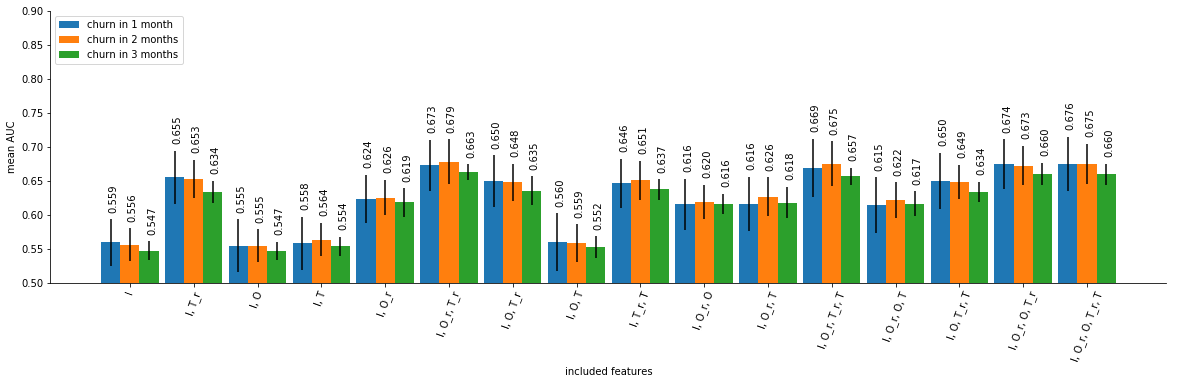

(9, 10, 12)


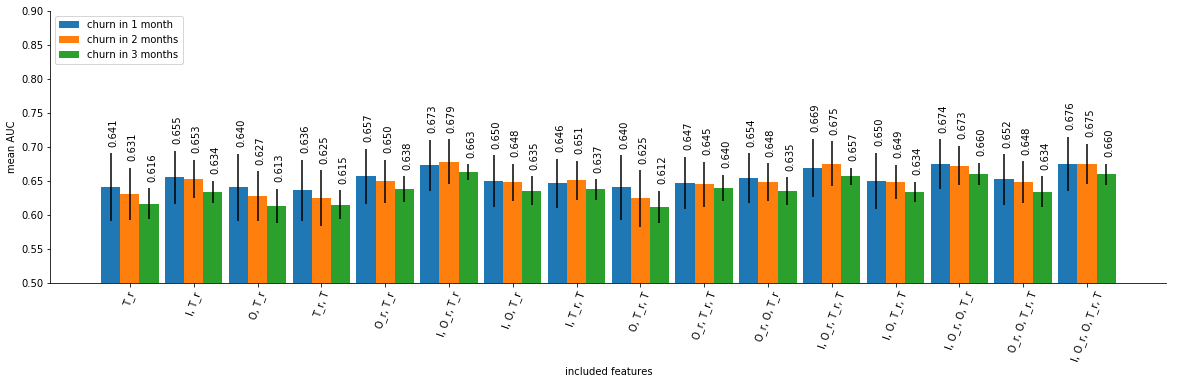

In [215]:
plt.close()

for f in D.keys():
    print f
    fig,ax = plt.subplots(figsize=(20,5))
    list_of_feature_groups= Select(Features(),f)

    for dependent in list_of_dependent_variables:
        means = []
        stds = []
        for feature_group in list_of_feature_groups:
            auc_scores = []
            for result in U9[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                auc_scores.append(auc)
            means.append(np.mean(auc_scores))
            stds.append(np.std(auc_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    plt.savefig(os.path.join(path_out,"unbalanced_include_%s.png"%str(f)),bbox_inches='tight')
    plt.show()

(13, 14)


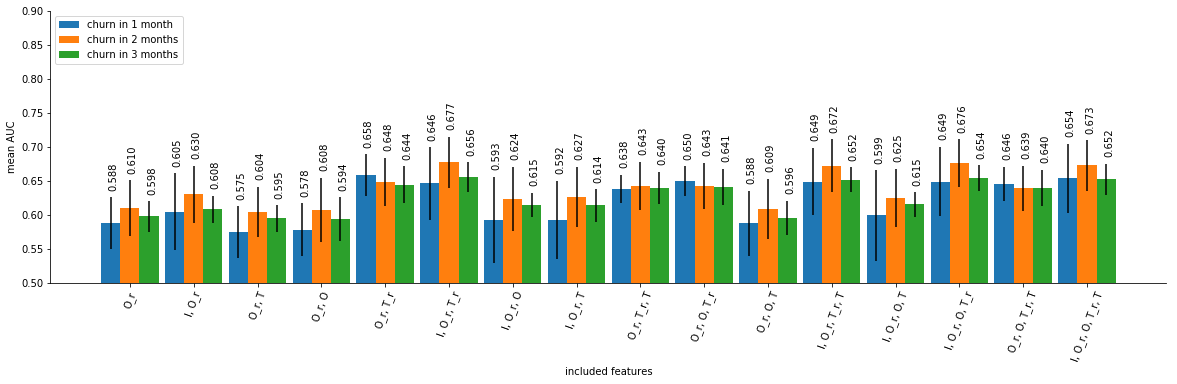

(4, 5, 8)


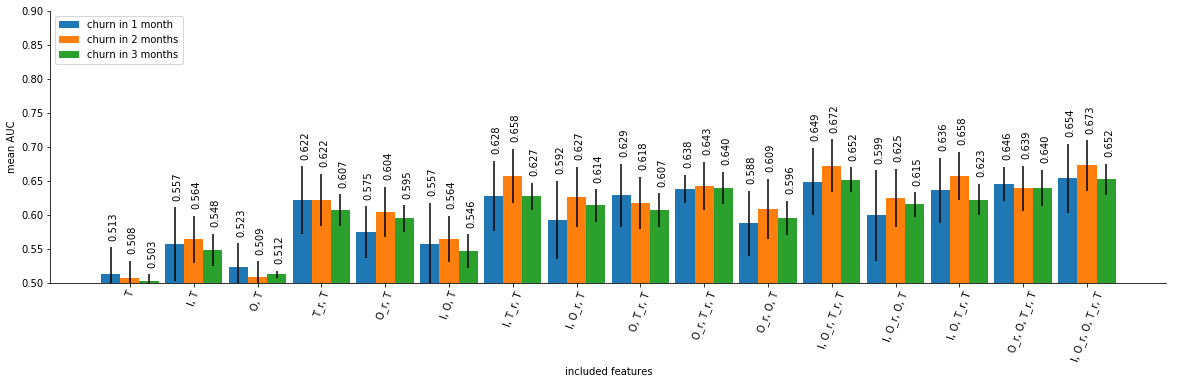

(6, 7)


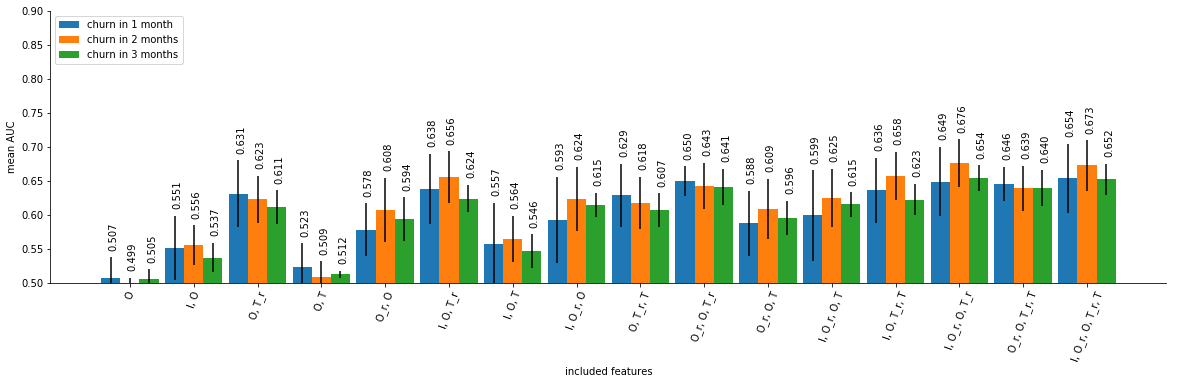

(3, 11)


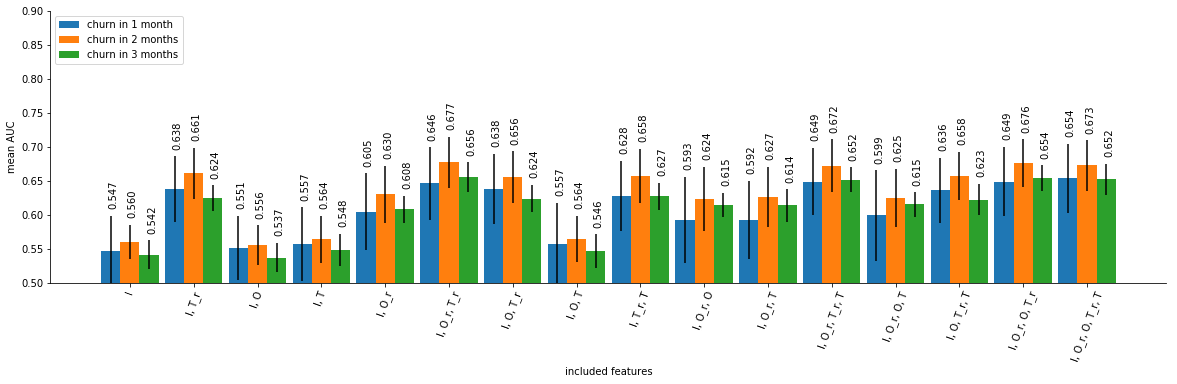

(9, 10, 12)


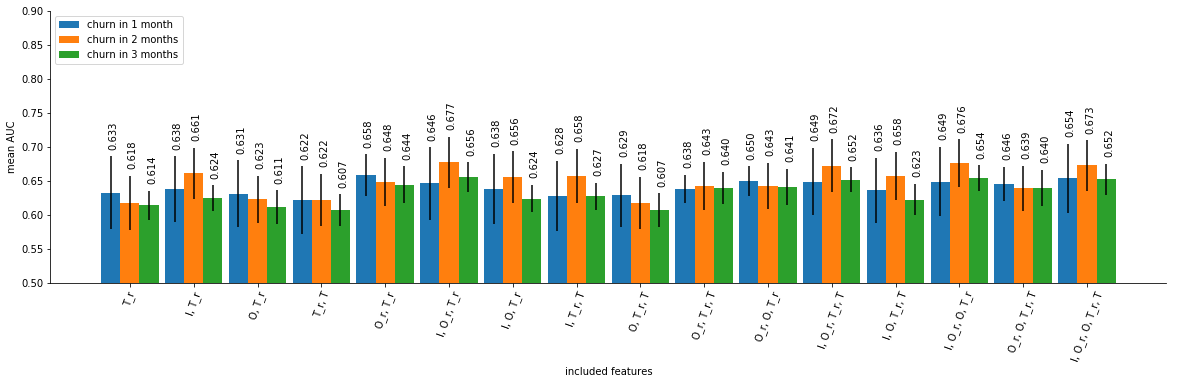

In [216]:
plt.close()

for f in D.keys():
    print f
    fig,ax = plt.subplots(figsize=(20,5))
    list_of_feature_groups= Select(Features(),f)

    for dependent in list_of_dependent_variables:
        means = []
        stds = []
        for feature_group in list_of_feature_groups:
            auc_scores = []
            for result in B9[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                auc_scores.append(auc)
            means.append(np.mean(auc_scores))
            stds.append(np.std(auc_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    plt.savefig(os.path.join(path_out,"balanced_include_%s.png"%str(f)),bbox_inches='tight')
    plt.show()

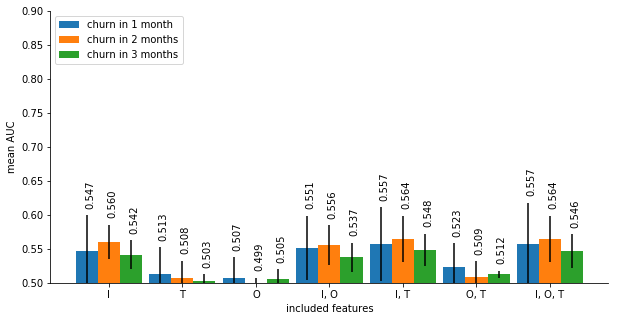

In [225]:
plt.close()
fig,ax = plt.subplots(figsize=(10,5))

list_of_feature_groups= Select(Features(), "static")

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"static_balanced_new.png"),bbox_inches='tight')
plt.show()

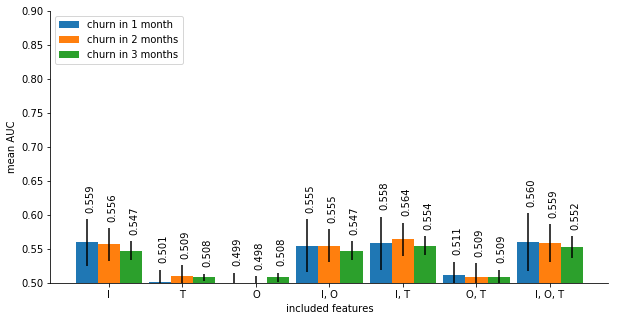

In [222]:
plt.close()
fig,ax = plt.subplots(figsize=(10,5))

list_of_feature_groups= Select(Features(), "static")

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"static_unbalanced_new.png"),bbox_inches='tight')
plt.show()

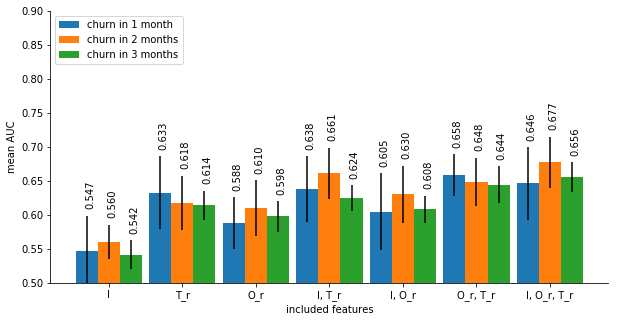

In [223]:
plt.close()
fig,ax = plt.subplots(figsize=(10,5))

list_of_feature_groups= Select(Features(), "retro")

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"retro_balanced_new.png"),bbox_inches='tight')
plt.show()

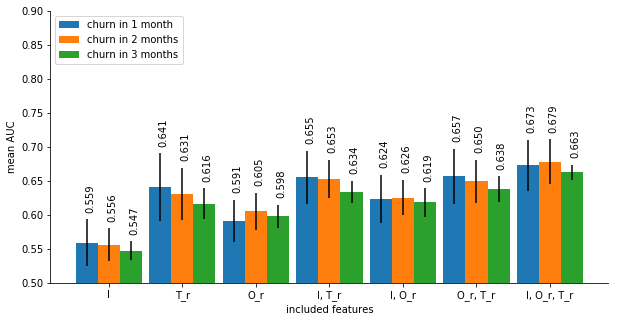

In [224]:
plt.close()
fig,ax = plt.subplots(figsize=(10,5))

list_of_feature_groups= Select(Features(), "retro")

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)])
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"retro_unbalanced_new.png"),bbox_inches='tight')
plt.show()

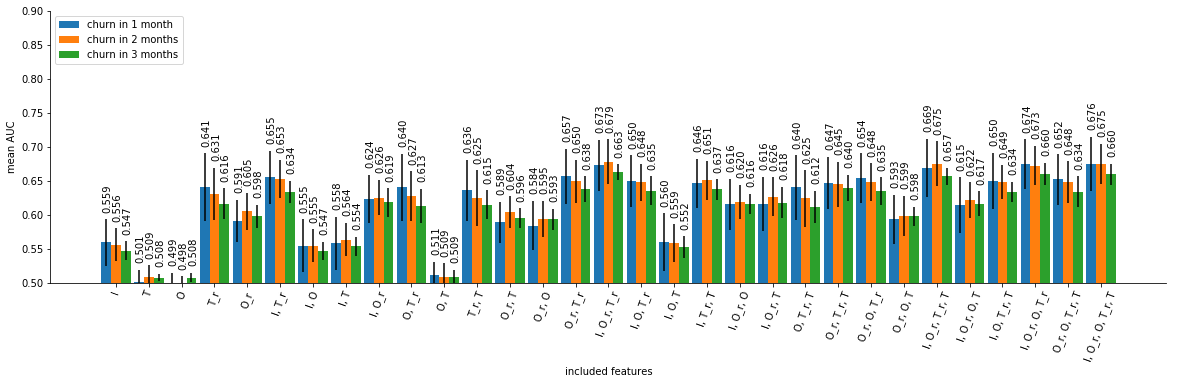

In [91]:
plt.close()
fig,ax = plt.subplots(figsize=(20,5))


list_of_feature_groups = Features()

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"Unbalanced9.png"),bbox_inches='tight')
plt.show()

In [32]:
for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    print dependent, "%.4f" %np.max(means),means.index(np.max(means))
    print dependent, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

0 0.6755 30
0 0.6140 0.0372
1 0.6786 15
1 0.6144 0.0282
2 0.6630 15
2 0.6053 0.0166


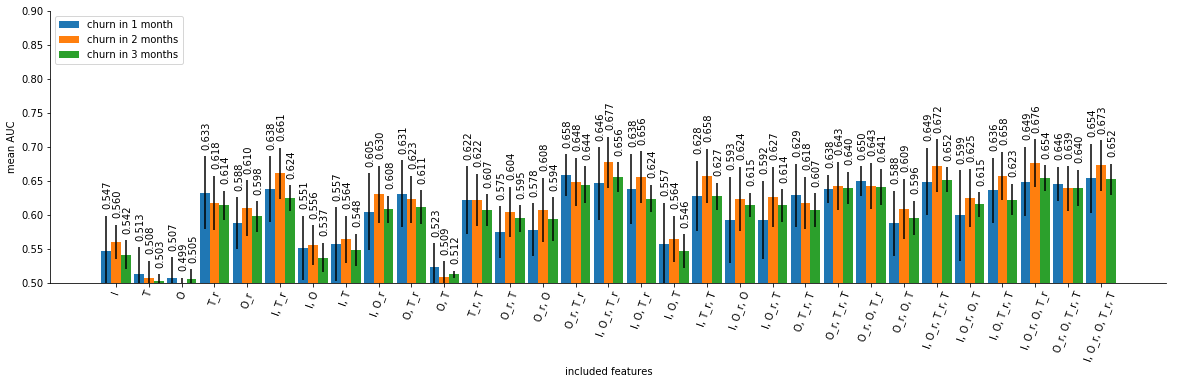

In [92]:
plt.close()
fig,ax = plt.subplots(figsize=(20,5))


list_of_feature_groups = Features()

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B9[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"balanced9.png"),bbox_inches='tight')
plt.show()

In [94]:
from scipy import stats

In [95]:
def non_normal(distribution,alpha = 0.05):
    _,p = stats.normaltest(distribution)
    return True if p<alpha else False

In [137]:
def plot_significance_matrix(dataframe,dependent):
    plt.close()
    plt.figure(figsize=(20,20))
    mask = np.zeros_like(dataframe, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    if dependent == 0:
        color = "Blues_r"
    elif dependent == 1:
        color = "Oranges_r"
    else:
        color = "Greens_r"
    cmap = sbn.color_palette(color)
    sbn.heatmap(dataframe, mask=mask, cmap=cmap,square=True,cbar_kws = {"shrink":.5},vmin=0.0,vmax=0.06,annot=True,fmt='.3f')
    plt.xticks(rotation=70)
    plt.savefig(os.path.join(path_out,"balanced_significance%s.png" %dependent),bbox_inches='tight')
    plt.show()

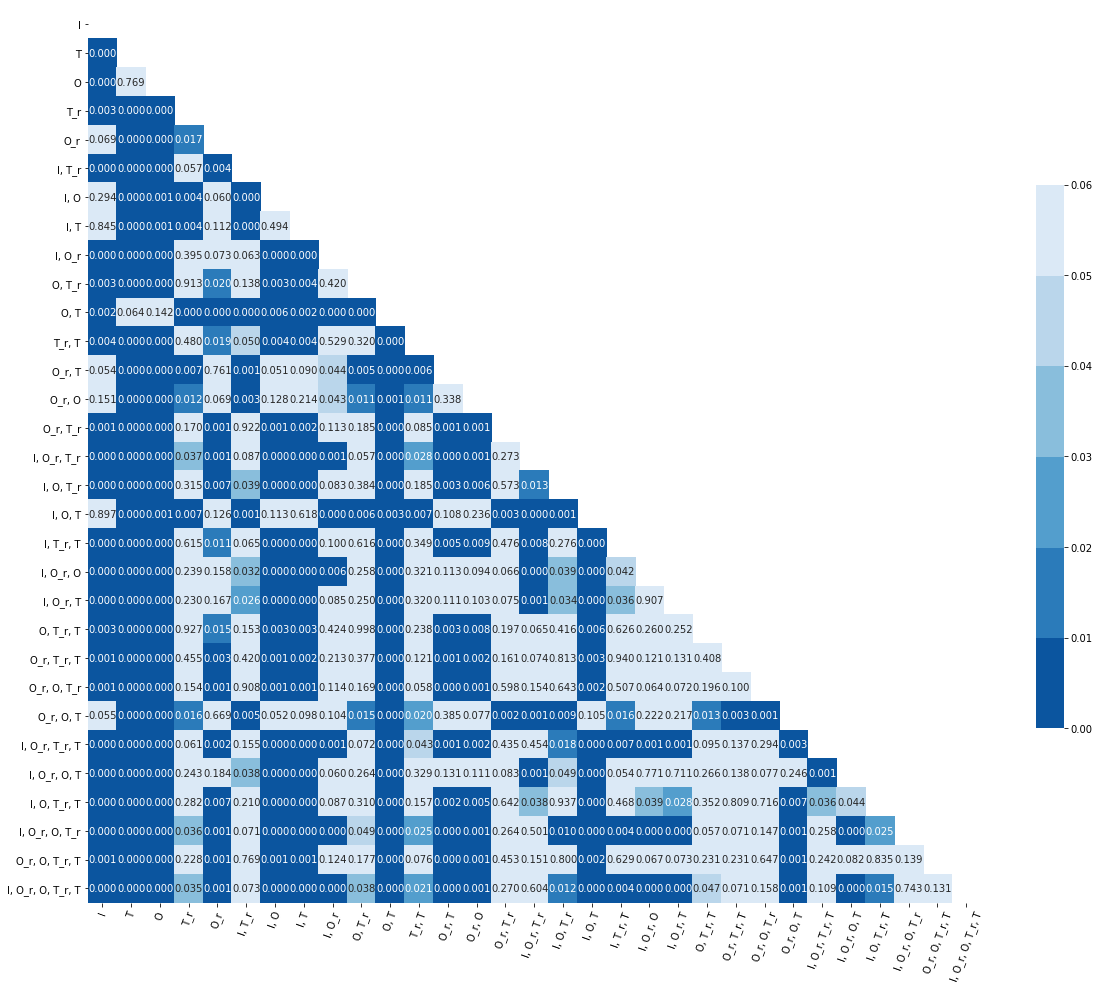

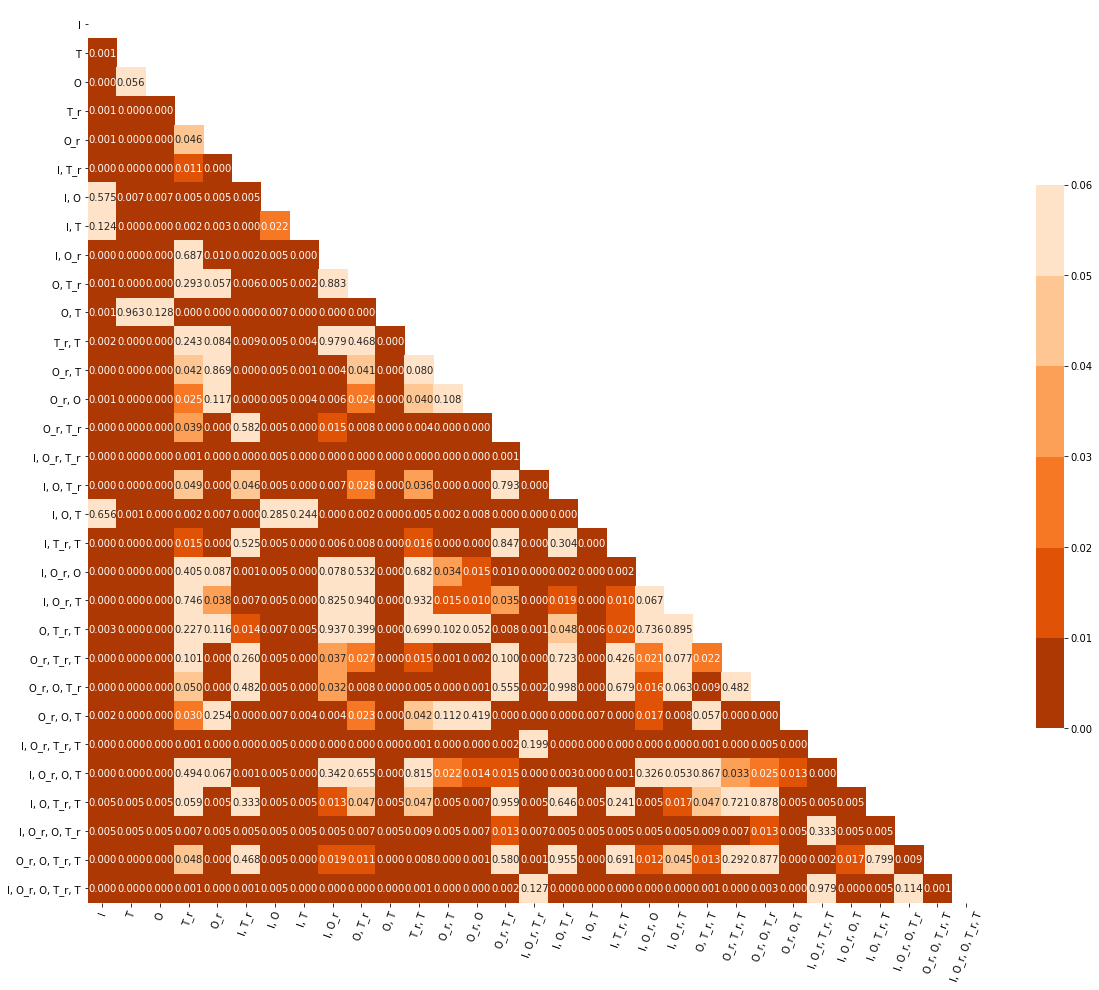

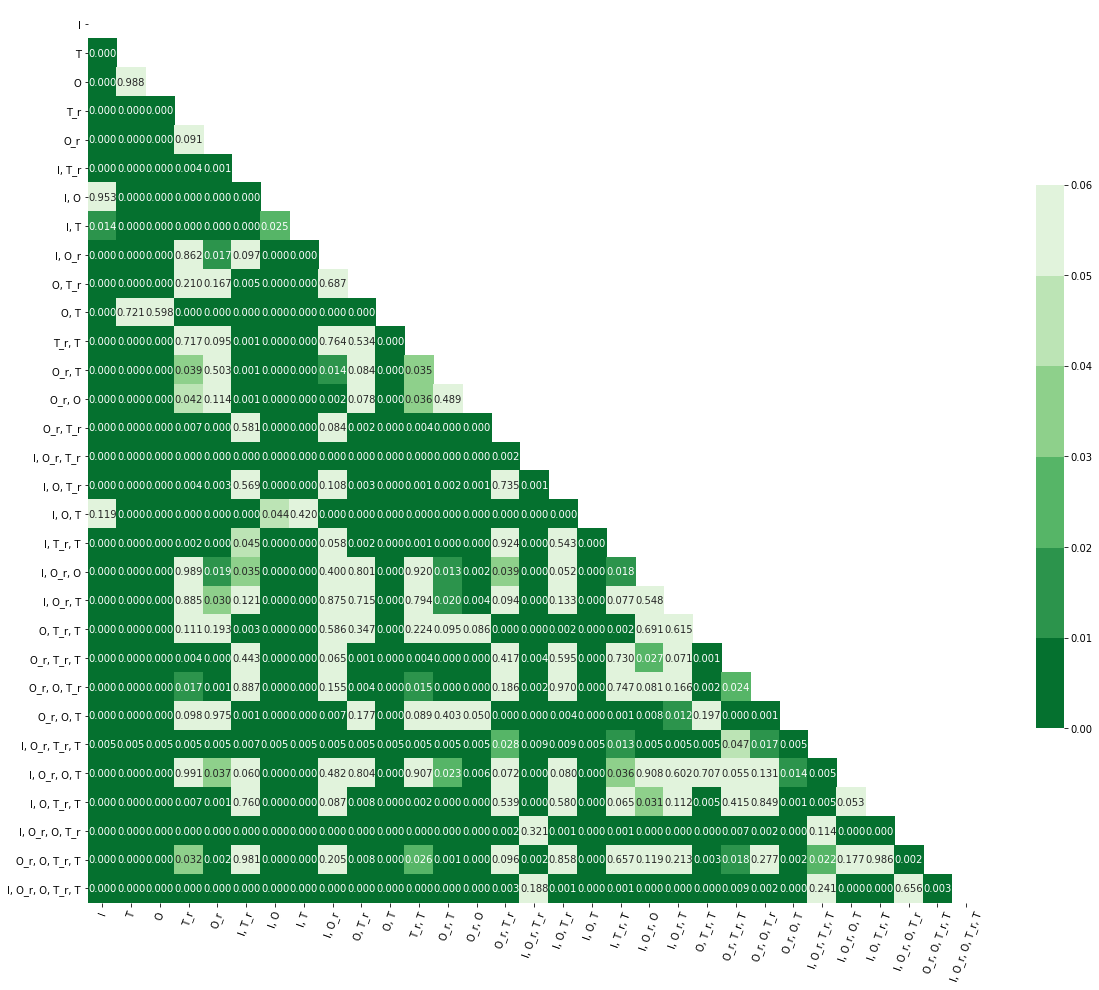

In [136]:
significance_matrix = pd.DataFrame()


list_of_feature_groups = Features()
for dependent in list_of_dependent_variables:
    scores= []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        scores.append(auc_scores)
    for t1 in scores:
        c = []
        for t2 in scores:
            r = []
            if non_normal(t1) or non_normal(t2):
                _,r = stats.wilcoxon(t1,t2)
            else:
                _,r = stats.ttest_rel(t1, t2)
            c.append(r)
        col_name = ', '.join(Readable(Features())[scores.index(t1)])
        significance_matrix[col_name]=c
    Di = dict()
    for i,v in enumerate(list(significance_matrix.columns)):
        D[i]=v
    significance_matrix.rename(D,inplace=True)
    plot_significance_matrix(significance_matrix,dependent)

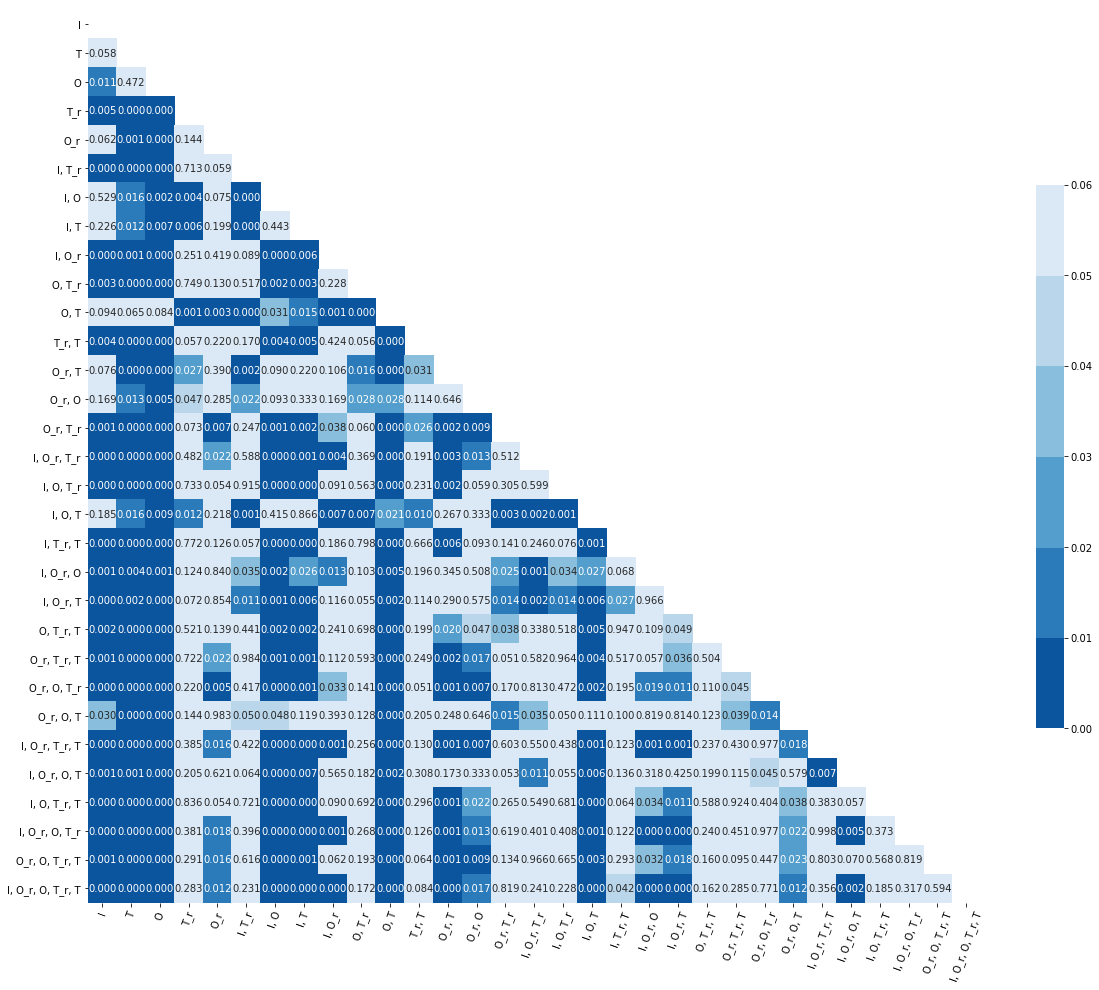

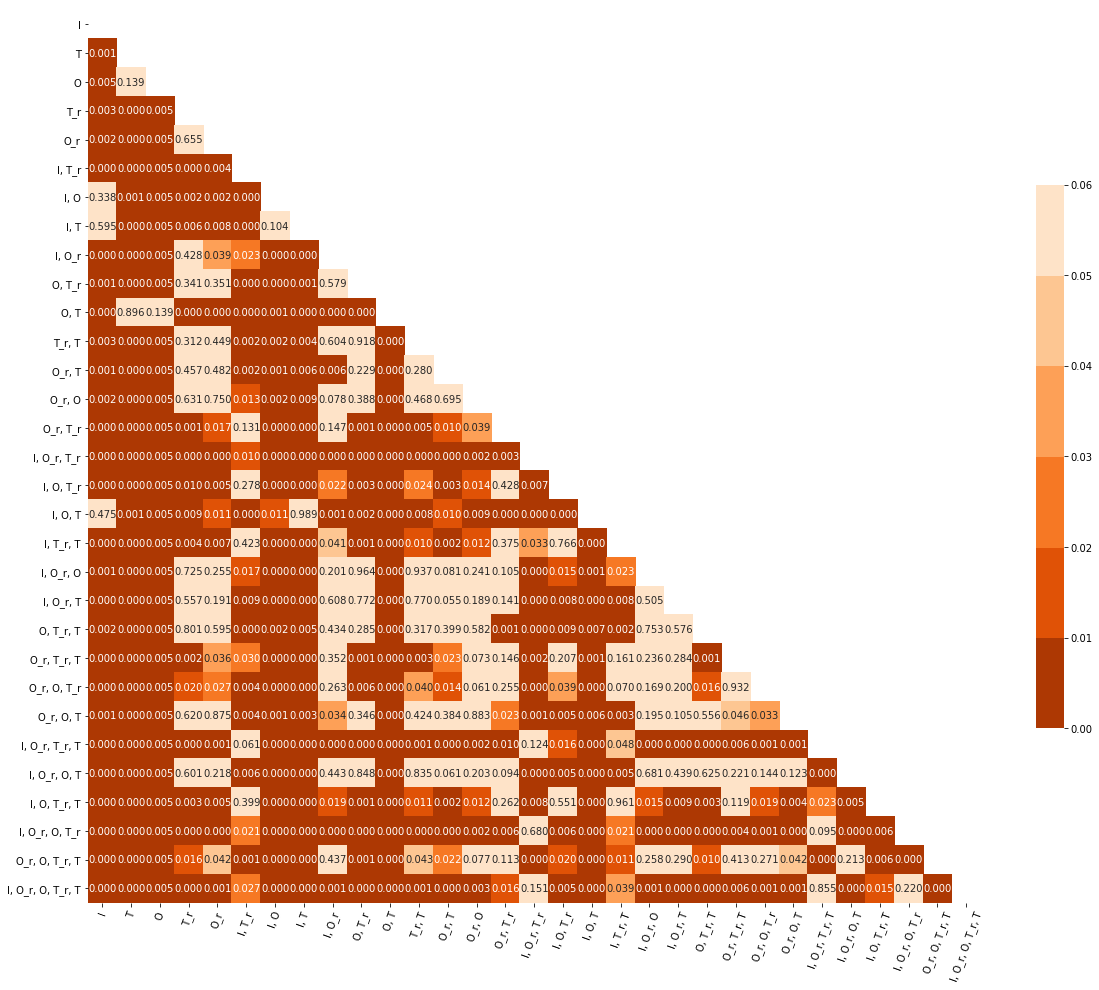

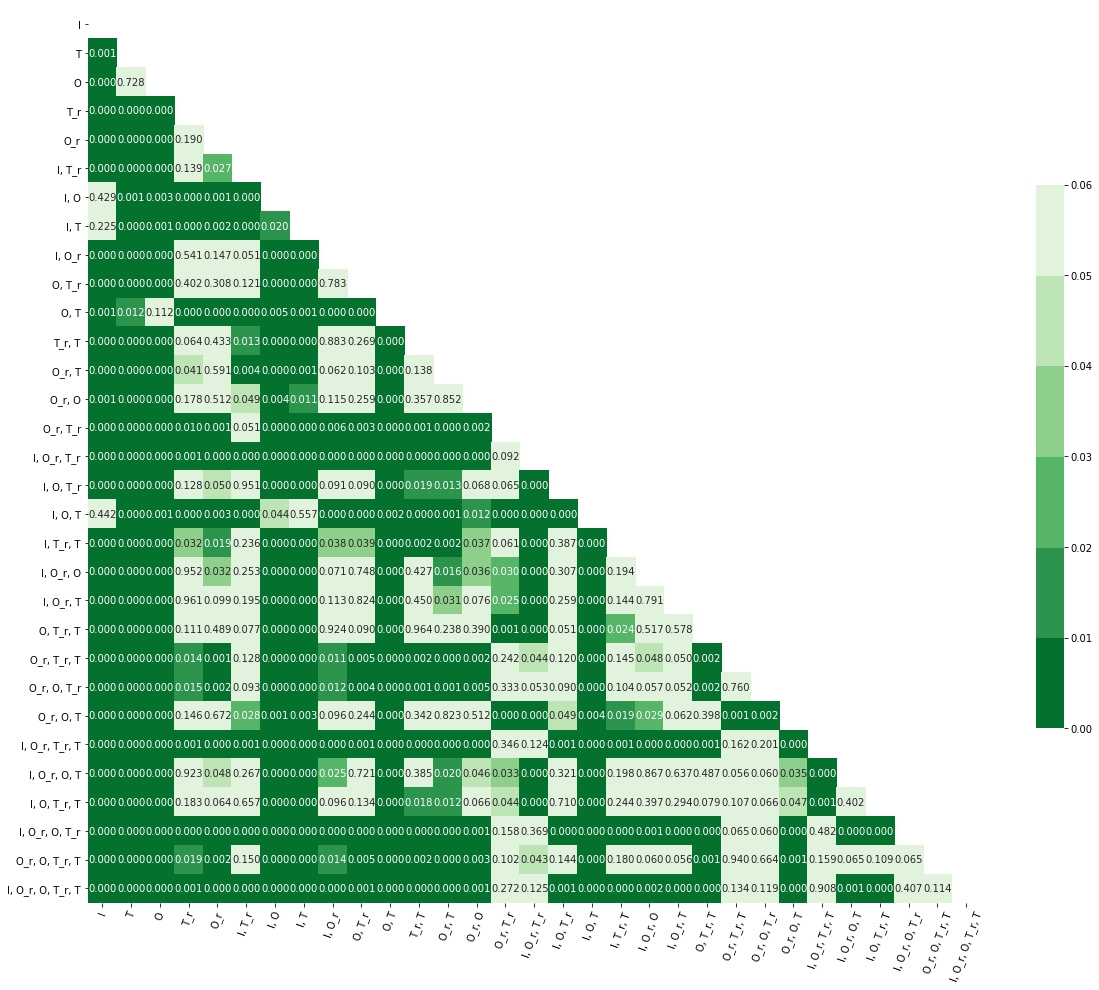

In [138]:
significance_matrix = pd.DataFrame()
churnvalues = []

list_of_feature_groups = Features()
for dependent in list_of_dependent_variables:
    scores= []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B9[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        scores.append(auc_scores)
    for t1 in scores:
        c = []
        for t2 in scores:
            r = []
            if non_normal(t1) or non_normal(t2):
                _,r = stats.wilcoxon(t1,t2)
            else:
                _,r = stats.ttest_rel(t1, t2)
            c.append(r)
        col_name = ', '.join(Readable(Features())[scores.index(t1)])
        significance_matrix[col_name]=c
    Di = dict()
    for i,v in enumerate(list(significance_matrix.columns)):
        D[i]=v
    significance_matrix.rename(D,inplace=True)
    plot_significance_matrix(significance_matrix,dependent)

In [29]:
new_matrix = pd.DataFrame()

list_of_feature_groups = Features()
new_matrix["Included features"]= [', '.join(g) for g in Readable(list_of_feature_groups)]
for dependent in list_of_dependent_variables:
    churnvalues = []
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U9[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    for i in range(len(means)):
        churnvalues.append(r"%.3f $\pm$ %.3f" %(means[i],stds[i]))
    new_matrix[dependent]=churnvalues

In [30]:
new_matrix

Included features                  0                  1                  2
0                   I  0.559 $\pm$ 0.034  0.556 $\pm$ 0.024  0.547 $\pm$ 0.014
1                   T  0.501 $\pm$ 0.018  0.509 $\pm$ 0.016  0.508 $\pm$ 0.005
2                   O  0.499 $\pm$ 0.016  0.498 $\pm$ 0.011  0.508 $\pm$ 0.007
3                 T_r  0.641 $\pm$ 0.050  0.631 $\pm$ 0.038  0.616 $\pm$ 0.023
4                 O_r  0.591 $\pm$ 0.031  0.605 $\pm$ 0.027  0.598 $\pm$ 0.017
5              I, T_r  0.655 $\pm$ 0.039  0.653 $\pm$ 0.029  0.634 $\pm$ 0.016
6                I, O  0.555 $\pm$ 0.039  0.555 $\pm$ 0.024  0.547 $\pm$ 0.014
7                I, T  0.558 $\pm$ 0.039  0.564 $\pm$ 0.024  0.554 $\pm$ 0.014
8              I, O_r  0.624 $\pm$ 0.036  0.626 $\pm$ 0.026  0.619 $\pm$ 0.021
9              O, T_r  0.640 $\pm$ 0.050  0.627 $\pm$ 0.037  0.613 $\pm$ 0.025
10               O, T  0.511 $\pm$ 0.020  0.509 $\pm$ 0.020  0.509 $\pm$ 0.010
11             T_r, T  0.636 $\pm$ 0.045  0.625 $\pm$ 0.041  0.615 $\pm$ 0.021
12             O_r, T  0.589 $\pm$ 0.030  0.604 $\pm$ 0.023  0.596 $\pm$ 0.015
13             O_r, O  0.584 $\pm$ 0.036  0.595 $\pm$ 0.026  0.593 $\pm$ 0.016
14           O_r, T_r  0.657 $\pm$ 0.041  0.650 $\pm$ 0.032  0.638 $\pm$ 0.019
15        I, O_r, T_r  0.673 $\pm$ 0.038  0.679 $\pm$ 0.033  0.663 $\pm$ 0.011
16          I, O, T_r  0.650 $\pm$ 0.038  0.648 $\pm$ 0.027  0.635 $\pm$ 0.021
17            I, O, T  0.560 $\pm$ 0.042  0.559 $\pm$ 0.028  0.552 $\pm$ 0.016
18          I, T_r, T  0.646 $\pm$ 0.037  0.651 $\pm$ 0.029  0.637 $\pm$ 0.015
19          I, O_r, O  0.616 $\pm$ 0.038  0.620 $\pm$ 0.025  0.616 $\pm$ 0.015
20          I, O_r, T  0.616 $\pm$ 0.040  0.626 $\pm$ 0.029  0.618 $\pm$ 0.023
21          O, T_r, T  0.640 $\pm$ 0.047  0.625 $\pm$ 0.042  0.612 $\pm$ 0.024
22        O_r, T_r, T  0.647 $\pm$ 0.038  0.645 $\pm$ 0.033  0.640 $\pm$ 0.019
23        O_r, O, T_r  0.654 $\pm$ 0.036  0.648 $\pm$ 0.028  0.635 $\pm$ 0.020
24          O_r, O, T  0.593 $\pm$ 0.036  0.599 $\pm$ 0.029  0.598 $\pm$ 0.014
25     I, O_r, T_r, T  0.669 $\pm$ 0.043  0.675 $\pm$ 0.033  0.657 $\pm$ 0.013
26       I, O_r, O, T  0.615 $\pm$ 0.041  0.622 $\pm$ 0.026  0.617 $\pm$ 0.018
27       I, O, T_r, T  0.650 $\pm$ 0.041  0.649 $\pm$ 0.025  0.634 $\pm$ 0.015
28     I, O_r, O, T_r  0.674 $\pm$ 0.037  0.673 $\pm$ 0.029  0.660 $\pm$ 0.016
29     O_r, O, T_r, T  0.652 $\pm$ 0.037  0.648 $\pm$ 0.030  0.634 $\pm$ 0.023
30  I, O_r, O, T_r, T  0.676 $\pm$ 0.040  0.675 $\pm$ 0.029  0.660 $\pm$ 0.015

In [31]:
new_matrix.to_csv("meansstdvs_new_U.csv", sep="&",index = False)

unbalanced

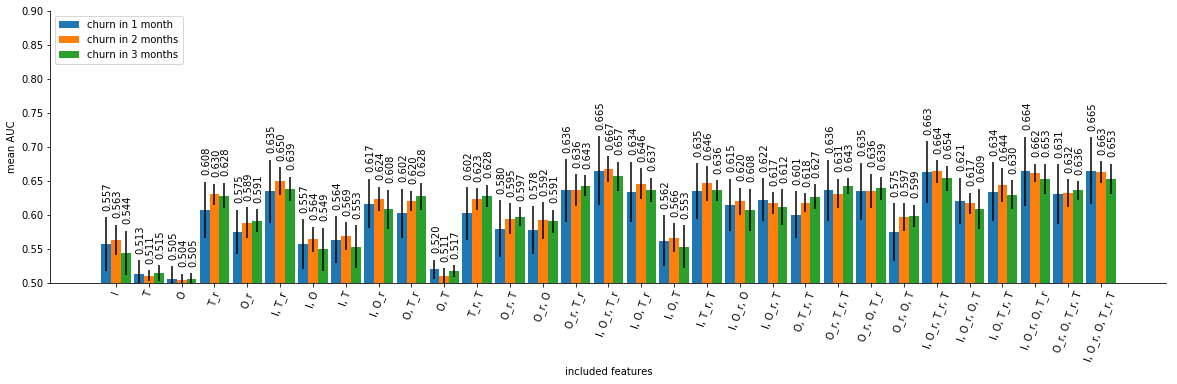

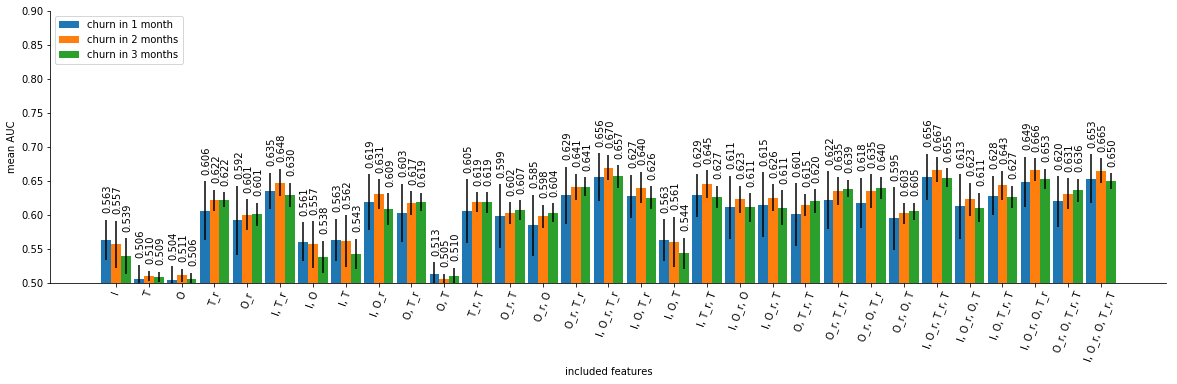

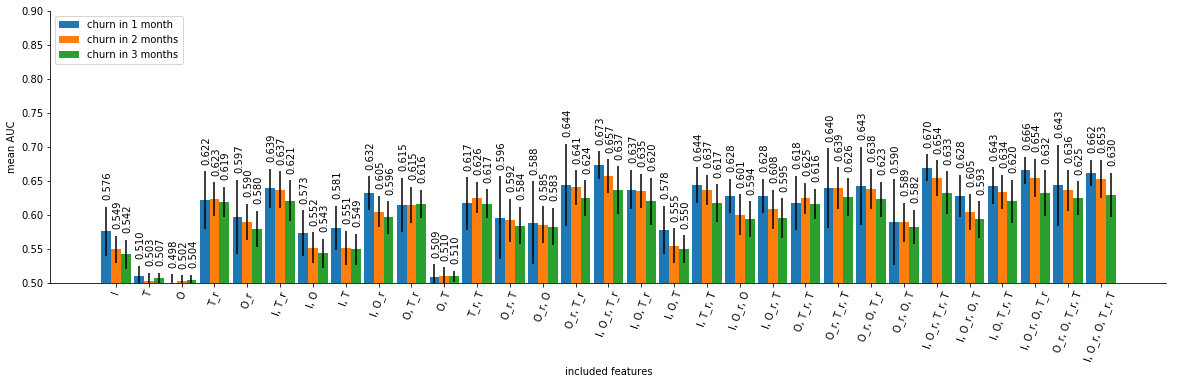

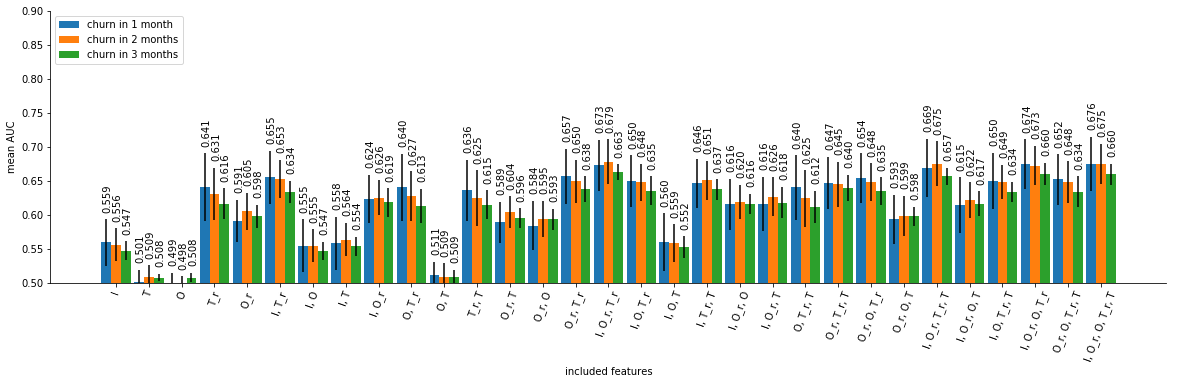

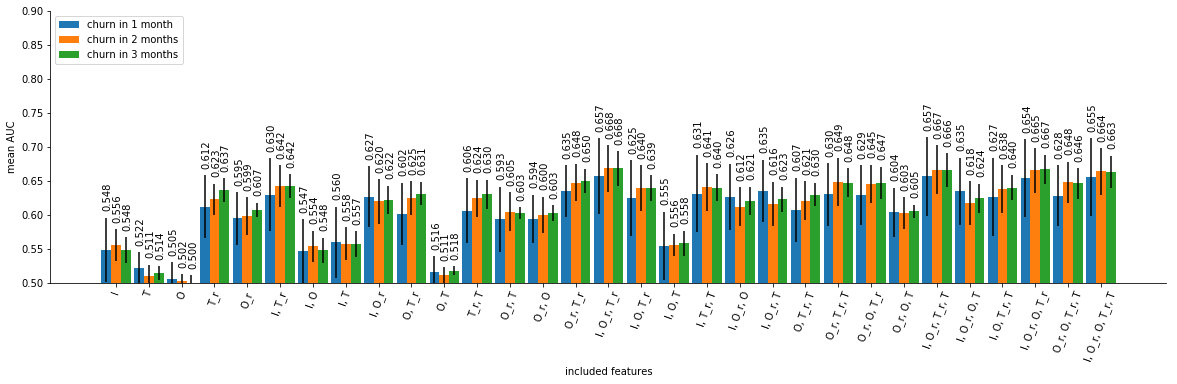

In [26]:
for name,U in enumerate([U6,U7,U8,U9,U10]):
    plt.close()
    fig,ax = plt.subplots(figsize=(20,5))

    for dependent in list_of_dependent_variables:
        means = []
        stds = []
        for feature_group in list_of_feature_groups:
            auc_scores = []
            for result in U[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                auc_scores.append(auc)
            means.append(np.mean(auc_scores))
            stds.append(np.std(auc_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    plt.savefig(os.path.join(path_out,"Unbalanced%s.png" %name),bbox_inches='tight')
    plt.show()

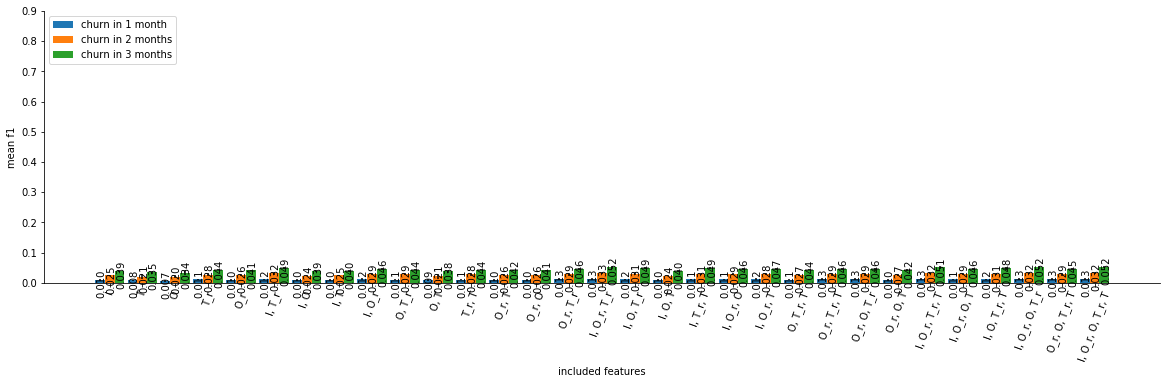

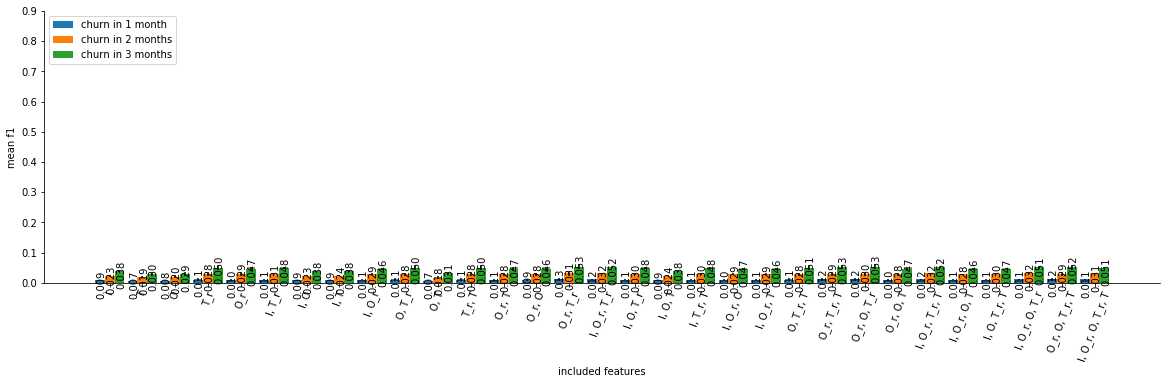

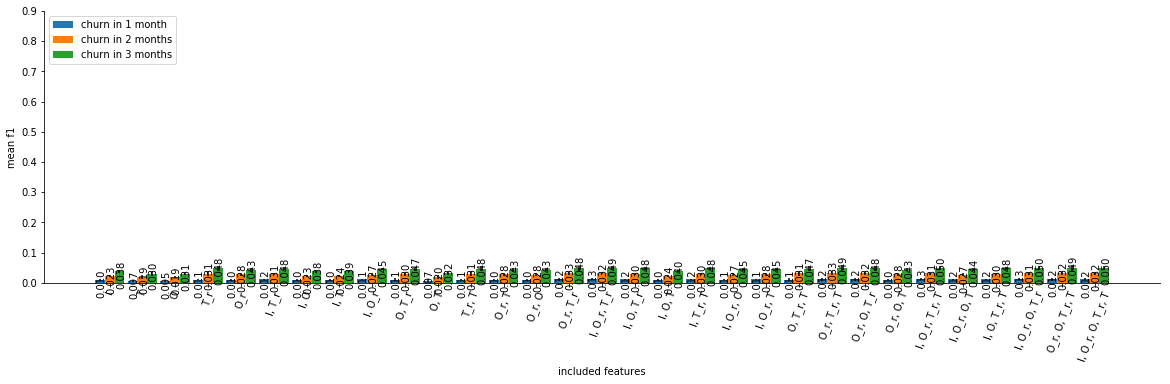

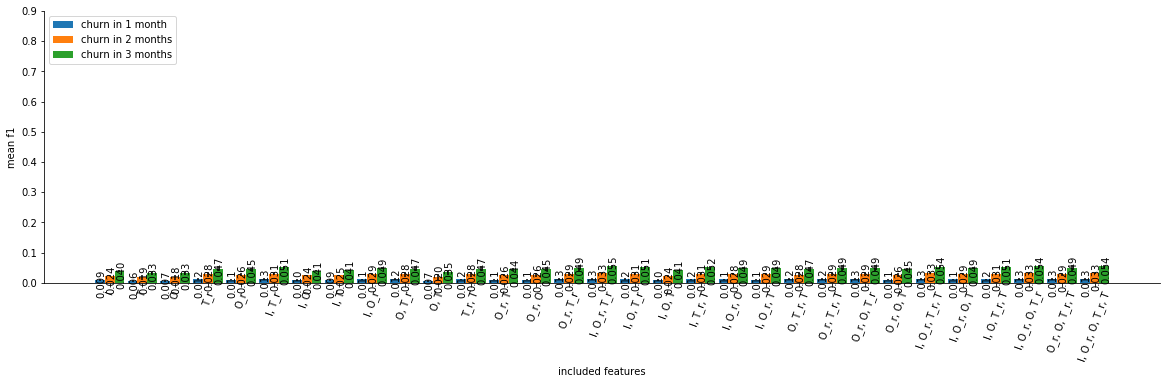

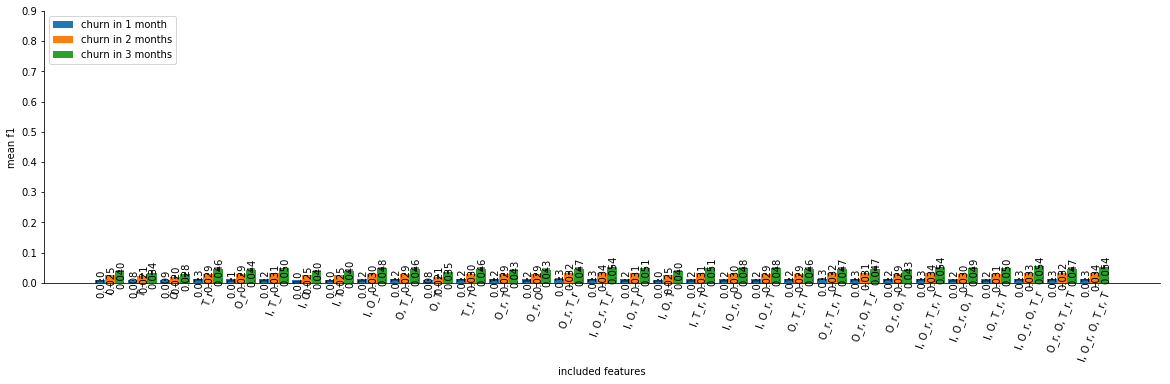

In [38]:
for name,U in enumerate([U6,U7,U8,U9,U10]):
    plt.close()
    fig,ax = plt.subplots(figsize=(20,5))

    for dependent in list_of_dependent_variables:
        means = []
        fmeans=[]
        stds = []
        fstds=[]
        for feature_group in list_of_feature_groups:
            auc_scores = []
            f1_scores = []
            for result in U[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                f1 = result[2]
                auc_scores.append(auc)
                f1_scores.append(f1)
            means.append(np.mean(auc_scores))
            fmeans.append(np.mean(f1_scores))
            stds.append(np.std(auc_scores))
            fstds.append(np.std(f1_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),fmeans,width,yerr=fstds)
        for i, v in enumerate(fmeans):
            ax.text(i+((col_index-1.85)*width),v+fstds[i]+0.005,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean f1")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    #plt.savefig(os.path.join(path_out,"Unbalanced%s.png" %name),bbox_inches='tight')
    plt.show()

balanced

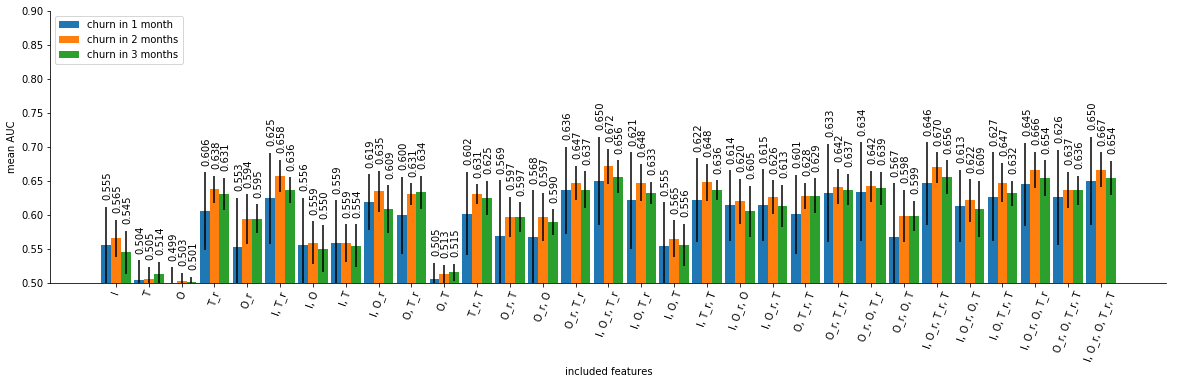

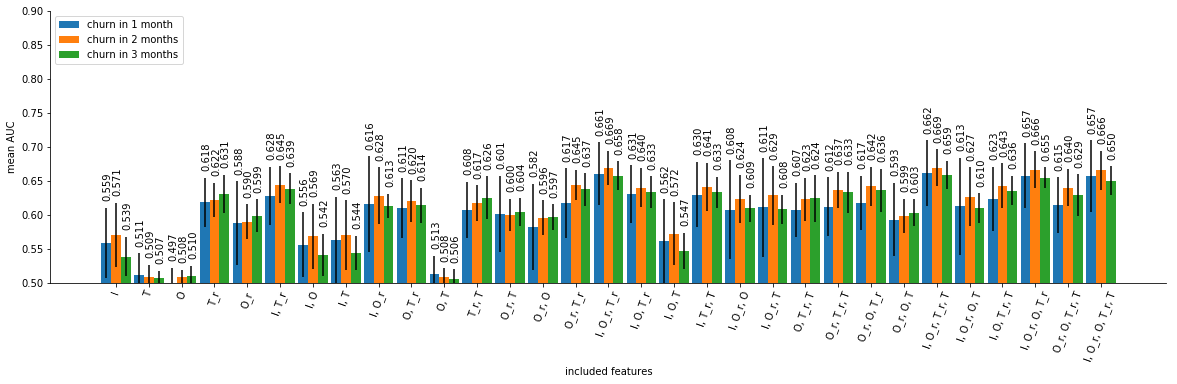

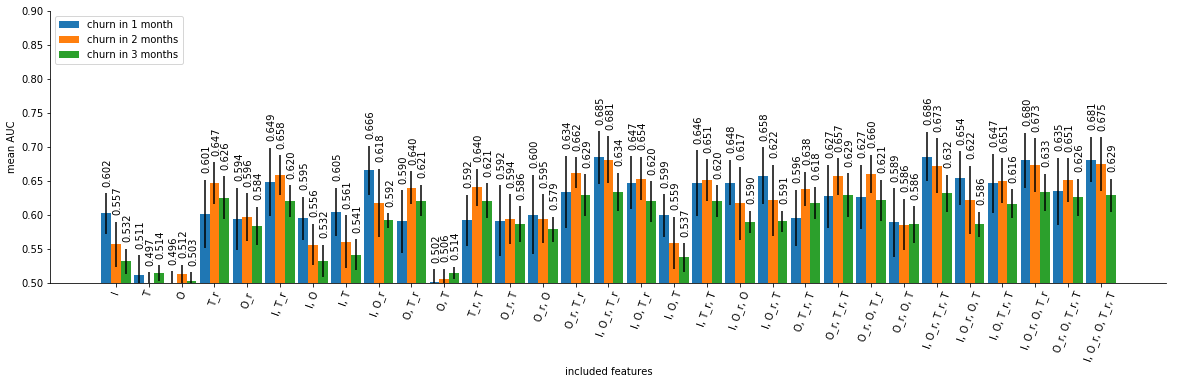

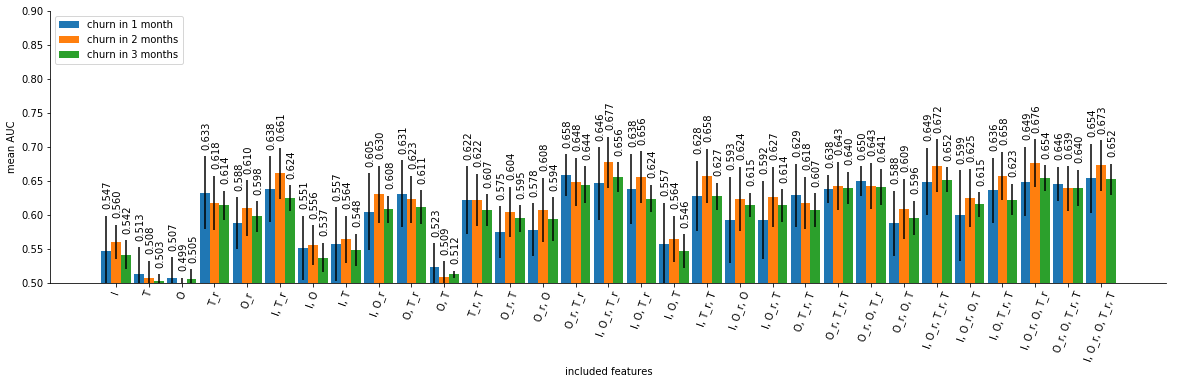

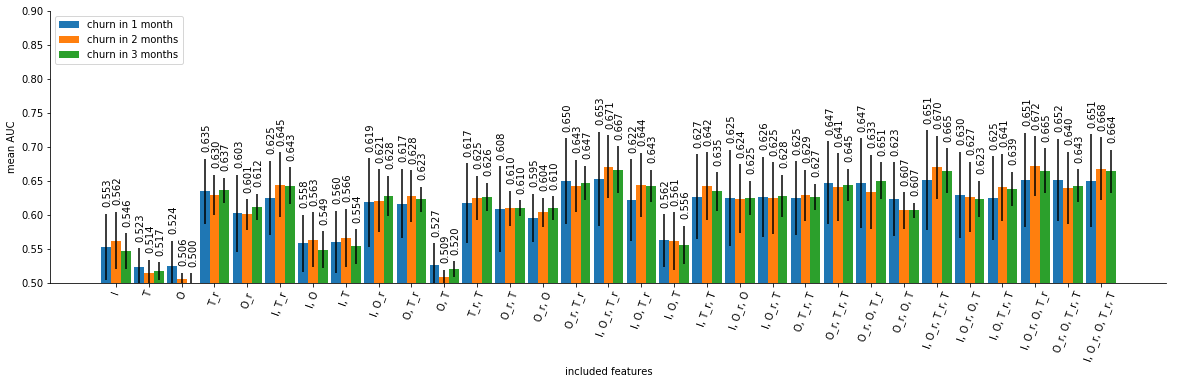

In [21]:
for name, B in enumerate([B6, B7, B8, B9, B10]):
    plt.close()
    fig,ax = plt.subplots(figsize=(20,5))

    for dependent in list_of_dependent_variables:
        means = []
        stds = []
        for feature_group in list_of_feature_groups:
            auc_scores = []
            for result in B[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                auc_scores.append(auc)
            means.append(np.mean(auc_scores))
            stds.append(np.std(auc_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
        for i, v in enumerate(means):
            ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean AUC")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    plt.savefig(os.path.join(path_out,"balanced%s.png"%name),bbox_inches='tight')
    plt.show()

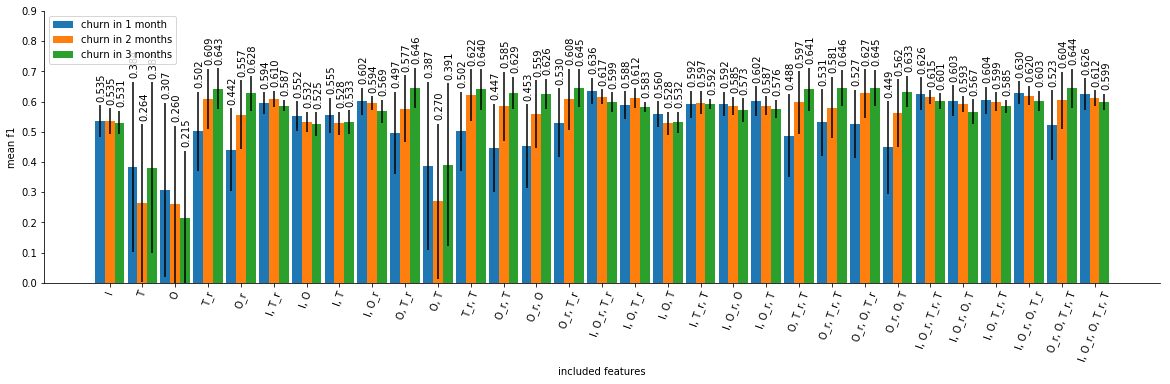

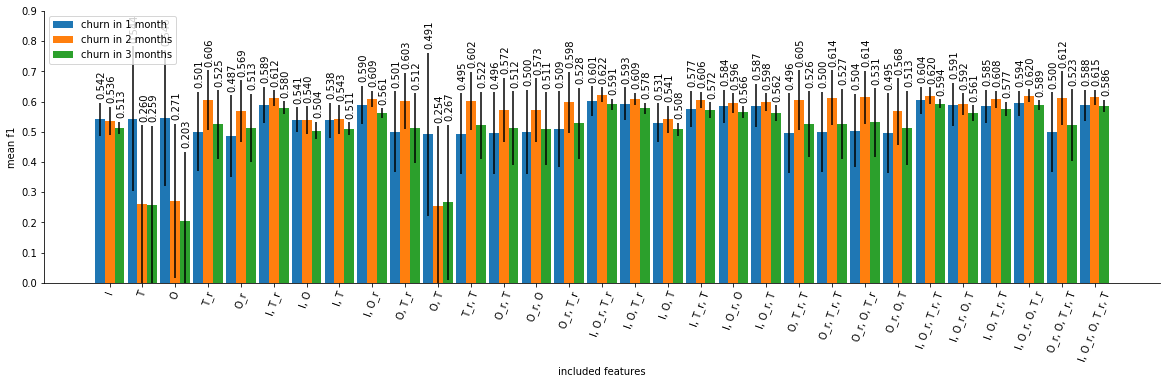

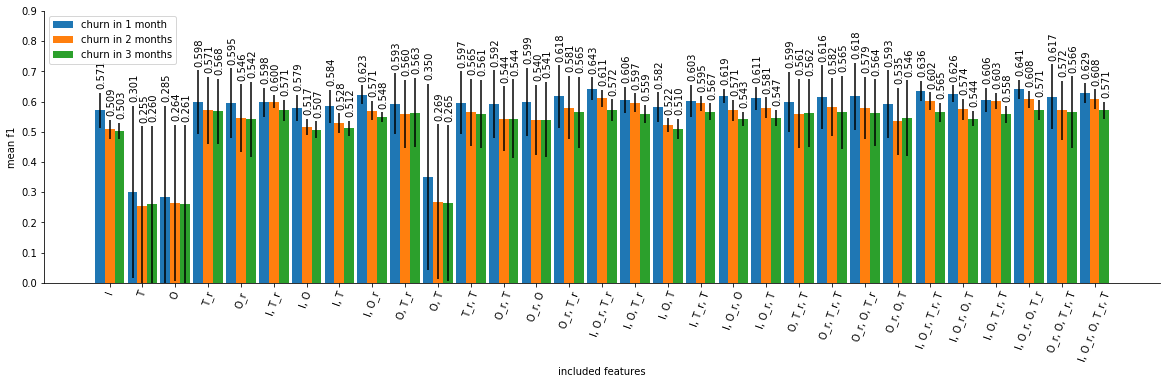

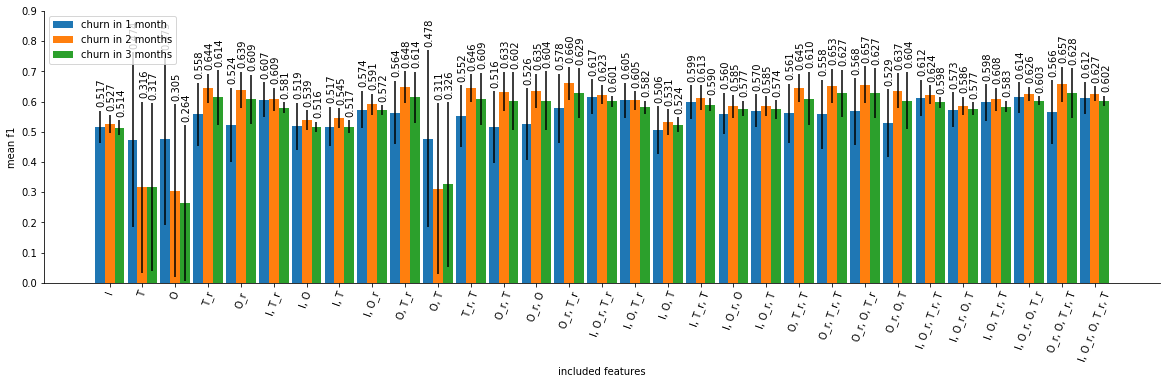

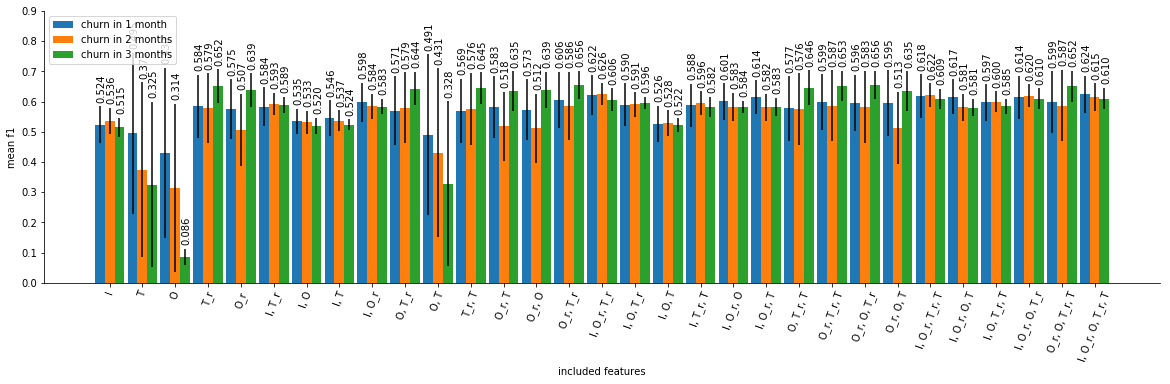

In [37]:
for name, B in enumerate([B6, B7, B8, B9, B10]):
    plt.close()
    fig,ax = plt.subplots(figsize=(20,5))

    for dependent in list_of_dependent_variables:
        means = []
        fmeans=[]
        stds = []
        fstds=[]
        for feature_group in list_of_feature_groups:
            auc_scores = []
            f1_scores = []
            for result in B[(dependent,feature_group)]:
                auc = result[0]
                settings = result[1]
                f1 = result[2]
                auc_scores.append(auc)
                f1_scores.append(f1)
            means.append(np.mean(auc_scores))
            fmeans.append(np.mean(f1_scores))
            stds.append(np.std(auc_scores))
            fstds.append(np.std(f1_scores))
        N = len(means)
        ind = np.arange(N)
        col_index = dependent+1
        width = 0.3
        ax.bar(ind+((col_index-2)*width),fmeans,width,yerr=fstds)
        for i, v in enumerate(fmeans):
            ax.text(i+((col_index-1.85)*width),v+fstds[i]+0.08,"%.3f"%v, rotation=90,ha="center")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,0.9)
    ax.set_xticks(ind)
    ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
    ax.set_xlabel("included features")
    ax.set_ylabel("mean f1")
    ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

    #plt.savefig(os.path.join(path_out,"Unbalanced%s.png" %name),bbox_inches='tight')
    plt.show()

In [ ]:
plt.close()
fig,ax = plt.subplots(figsize=(20,5))

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in balanced_balanced[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.9)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in readable_feature_groups],rotation=70)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"balancedbalanced.png"),bbox_inches='tight')
plt.show()

In [154]:
df = pd.DataFrame()
#df["feature groups"]=list_of_dependent_variables
for dependent in list_of_dependent_variables:
    print dependent
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        allsettings = []
        for result in unbalanced_unbalanced[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            allsettings.append(settings)
        print feature_group
        print allsettings
print df

0
((3, 11),)
[(0.05, 4), (0.2, 4), (0.05, 8), (0.05, 4), (0.05, 8), (0.05, 8), (0.05, 4), (0.1, 4), (0.1, 4), (0.05, 4)]
((4, 5, 8),)
[(0.05, 4), (0.05, 4), (0.05, 4), (0.05, 4), (0.05, 4), (0.2, 8), (0.05, 4), (0.05, 4), (0.2, 8), (0.2, 8)]
((6, 7),)
[(0.2, 4), (0.05, 4), (0.05, 4), (0.1, 8), (0.2, 8), (0.1, 8), (0.05, 4), (0.2, 8), (0.1, 8), (0.05, 4)]
((9, 10, 12),)
[(0.2, 6), (0.05, 4), (0.1, 8), (0.05, 6), (0.2, 6), (0.05, 6), (0.2, 8), (0.1, 4), (0.05, 6), (0.05, 4)]
((13, 14),)
[(0.05, 4), (0.05, 6), (0.2, 6), (0.05, 4), (0.1, 8), (0.05, 6), (0.1, 8), (0.05, 4), (0.1, 4), (0.2, 8)]
((3, 11), (9, 10, 12))
[(0.05, 8), (0.2, 4), (0.05, 6), (0.05, 4), (0.05, 8), (0.05, 4), (0.1, 4), (0.05, 6), (0.1, 6), (0.05, 6)]
((3, 11), (6, 7))
[(0.05, 6), (0.05, 6), (0.1, 8), (0.05, 4), (0.05, 8), (0.05, 8), (0.05, 4), (0.1, 4), (0.2, 4), (0.05, 4)]
((3, 11), (4, 5, 8))
[(0.1, 4), (0.1, 6), (0.2, 6), (0.05, 4), (0.05, 8), (0.2, 4), (0.05, 4), (0.1, 4), (0.2, 4), (0.1, 4)]
((3, 11), (13, 14))
[(